In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c districtdatalabs yellowbrick

In [3]:
import tensorflow as tf

In [4]:
#!pip install nltk
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')

# Read the CSV

In [5]:
data= pd.read_csv("mtsamples 4.csv", index_col=[0])
data

description  \
0      A 23-year-old white female presents with comp...   
1              Consult for laparoscopic gastric bypass.   
2              Consult for laparoscopic gastric bypass.   
3                                2-D M-Mode. Doppler.     
4                                    2-D Echocardiogram   
...                                                 ...   
4994   Patient having severe sinusitis about two to ...   
4995   This is a 14-month-old baby boy Caucasian who...   
4996   A female for a complete physical and follow u...   
4997   Mother states he has been wheezing and coughing.   
4998   Acute allergic reaction, etiology uncertain, ...   

                medical_specialty                                sample_name  \
0            Allergy / Immunology                         Allergic Rhinitis    
1                      Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                      Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3      Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4      Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    
...                           ...                                        ...   
4994         Allergy / Immunology                         Chronic Sinusitis    
4995         Allergy / Immunology      Kawasaki Disease - Discharge Summary    
4996         Allergy / Immunology                        Followup on Asthma    
4997         Allergy / Immunology                    Asthma in a 5-year-old    
4998         Allergy / Immunology                Allergy Evaluation Consult    

                                          transcription  \
0     SUBJECTIVE:,  This 23-year-old white female pr...   
1     PAST MEDICAL HISTORY:, He has difficulty climb...   
2     HISTORY OF PRESENT ILLNESS: , I have seen ABC ...   
3     2-D M-MODE: , ,1.  Left atrial enlargement wit...   
4     1.  The left ventricular cavity size and wall ...   
...                                                 ...   
4994  HISTORY:,  I had the pleasure of meeting and e...   
4995  ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...   
4996  SUBJECTIVE: , This is a 42-year-old white fema...   
4997  CHIEF COMPLAINT: , This 5-year-old male presen...   
4998  HISTORY: , A 34-year-old male presents today s...   

                                               keywords  
0     allergy / immunology, allergic rhinitis, aller...  
1     bariatrics, laparoscopic gastric bypass, weigh...  
2     bariatrics, laparoscopic gastric bypass, heart...  
3     cardiovascular / pulmonary, 2-d m-mode, dopple...  
4     cardiovascular / pulmonary, 2-d, doppler, echo...  
...                                                 ...  
4994                                                NaN  
4995  allergy / immunology, mucous membranes, conjun...  
4996                                                NaN  
4997                                                NaN  
4998                                                NaN  

[4999 rows x 5 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
 4   keywords           3931 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [7]:
del data['keywords']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4999 non-null   object
 1   medical_specialty  4999 non-null   object
 2   sample_name        4999 non-null   object
 3   transcription      4966 non-null   object
dtypes: object(4)
memory usage: 195.3+ KB


In [9]:
data.isnull().sum()

description           0
medical_specialty     0
sample_name           0
transcription        33
dtype: int64

In [10]:
data= data.dropna(axis = 0, how ='any') 
data.sample(5)

description  \
3287   History of diabetes, osteoarthritis, atrial f...   
2592   Exam under anesthesia.  Removal of intrauteri...   
1909   Template for History and Physical for a newborn.   
4934                  Flexible Bronchoscopy (pediatric)   
3838   Head injury, anxiety, and hypertensive emerge...   

                medical_specialty                    sample_name  \
3287             General Medicine             H&P - Gen Med - 2    
2592      Obstetrics / Gynecology    Intrauterine Clots Removal    
1909        Pediatrics - Neonatal   Normal Newborn H&P Template    
4934   Cardiovascular / Pulmonary      Bronchoscopy - Pediatric    
3838       Emergency Room Reports                   Head Injury    

                                          transcription  
3287  HISTORY OF PRESENT ILLNESS:, The patient is a ...  
2592  PREOPERATIVE DIAGNOSIS: , Postpartum hemorrhag...  
1909  HISTORY OF PRESENT ILLNESS: , This is a ** wee...  
4934  FLEXIBLE BRONCHOSCOPY,The flexible bronchoscop...  
3838  CHIEF COMPLAINT:,  Head injury.,HISTORY: , Thi...

In [11]:
data.isnull().sum()

description          0
medical_specialty    0
sample_name          0
transcription        0
dtype: int64

In [12]:
data['transcription']=data['transcription'].astype('str')
data['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [13]:
data['transcription'] = data['transcription'].str.lower()
data['transcription']

0       subjective:,  this 23-year-old white female pr...
1       past medical history:, he has difficulty climb...
2       history of present illness: , i have seen abc ...
3       2-d m-mode: , ,1.  left atrial enlargement wit...
4       1.  the left ventricular cavity size and wall ...
                              ...                        
4994    history:,  i had the pleasure of meeting and e...
4995    admitting diagnosis: , kawasaki disease.,disch...
4996    subjective: , this is a 42-year-old white fema...
4997    chief complaint: , this 5-year-old male presen...
4998    history: , a 34-year-old male presents today s...
Name: transcription, Length: 4966, dtype: object

In [14]:
# data['transcription'].replace(['#'], [' '], regex=True)

In [15]:
#getting rid of targeted charachters in the trascription
chars = ['#',':,',': ,',';','$','!','?','*','``','1. ', '2. ', '3. ', '4. ', '5. ','6. ','7. ','8. ','9. ','10. ']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c,"")

data.sample(5)

# chars = "\`*_{}[]()>#+-.,!$:;%'&/?"

description  \
2870              Headache.  Right frontal lobe glioma.   
780    Cellulitis with associated abscess and foreig...   
3432   A 2-month-old female with 1-week history of c...   
1645   Patient with a past medical history of a left...   
4938    Plastic piece foreign body in the right main...   

                medical_specialty                            sample_name  \
2870                    Neurology                            Glioma - 2    
780                       Surgery       Foreign Body Removal - Foot - 1    
3432             General Medicine      Congestion & Fever - 2-month-old    
1645                    Radiology        EMG/Nerve Conduction Study - 6    
4938   Cardiovascular / Pulmonary   Bronchoscopy & Foreign Body Removal    

                                          transcription  
2870  cc headache,hxy/o rhf presented to her local p...  
780   preoperative diagnoses cellulitis with associa...  
3432  chief complaint  a 2-month-old female with 1-w...  
1645  history  the patient is a 46-year-old right-ha...  
4938  preoperative diagnosis foreign body in airway....

In [16]:
#getting rid of targeted charachters in the trascription
chars = [",", ".", "[", "]", ":", "``", ")", "(", "1", "2", "5", "%", "3", "4", "4-0", "3-0", "6", "''", "0", "2-0", "8", "7", "&", "5-0", "9", "0.5", "1.5", "500", "50", "100", "6-0", "15", "2.5", "14-15", "60", "'", "300", "14", "________", "7-0", "90", "__________", "3.5", "1:100,000", "70", "0.", "80", "1:50,000", "03/08/200 ", "03/09/2007", "25605", "7.314", "33.0", "855.", "08/22/03", "10/500", "125.", "144/6", '__', '___', '____', '_____', '______', '_______']
for c in chars:
    data['transcription'] = data['transcription'].str.replace(c," ")

data.sample(5)


description  \
1983                                     Knee injection   
69     The patient is a 16-month-old boy, who had a ...   
757    Removal of painful hardware, first left metat...   
4546   Left buttock abscess, status post incision an...   
1946   1+ year, black female for initial evaluation ...   

                medical_specialty                      sample_name  \
1983              Pain Management                  Knee Injection    
69                        Urology               Penile Cellulitis    
757                       Surgery   Hardware Removal - Metatarsal    
4546   Consult - History and Phy.                 Buttock Abscess    
1946        Pediatrics - Neonatal                   Atopic Eczema    

                                          transcription  
1983  the patient was told that the injection may ca...  
69    chief complaint    penile cellulitis status po...  
757   title of operation removal of painful hardware...  
4546  chief complaint buttock abscess  history of pr...  
1946  subjective  this year  black female  new patie...

In [17]:
# Tokenizing 
from nltk.tokenize import word_tokenize

data['tokenized_sents'] = data['transcription'].apply(nltk.word_tokenize)
data.sample(5)

description  medical_specialty  \
1464   Followup of moderate-to-severe sleep apnea.  ...     Sleep Medicine   
4028   Removal of cystic lesion, removal of teeth, m...          Dentistry   
3640             Colonoscopy to screen for colon cancer   Gastroenterology   
502    Left facial cellulitis and possible odontogen...            Surgery   
3569   The patient was brought to the OR with the kn...   Gastroenterology   

                                          sample_name  \
1464                                     Sleep Apnea    
4028                                Teeth Extraction    
3640                                 Colonoscopy - 6    
502                          Odontogenic Abscess I&D    
3569   Endovascular Abdominal Aortic Aneurysm Repair    

                                          transcription  \
1464  reason for visit mr  abc is a   -year-old man ...   
4028  preoperative diagnoses  basal cell nevus syndr...   
3640  indications this is a   -year-old female who i...   
502   preoperative diagnoses left facial cellulitis ...   
3569  preoperative diagnosis abdominal aortic aneury...   

                                        tokenized_sents  
1464  [reason, for, visit, mr, abc, is, a, -year-old...  
4028  [preoperative, diagnoses, basal, cell, nevus, ...  
3640  [indications, this, is, a, -year-old, female, ...  
502   [preoperative, diagnoses, left, facial, cellul...  
3569  [preoperative, diagnosis, abdominal, aortic, a...

In [18]:
# data["tokenized_sents"] = data["tokenized_sents"].astype('str')

In [19]:
data["tokenized_sents"][0][0]

'subjective'

In [20]:
from nltk import pos_tag

In [21]:
nltk.tag.pos_tag(data["tokenized_sents"][0])

[('subjective', 'NN'),
 ('this', 'DT'),
 ('-year-old', 'JJ'),
 ('white', 'JJ'),
 ('female', 'NN'),
 ('presents', 'NNS'),
 ('with', 'IN'),
 ('complaint', 'NN'),
 ('of', 'IN'),
 ('allergies', 'NNS'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('allergies', 'NNS'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('lived', 'VBD'),
 ('in', 'IN'),
 ('seattle', 'NN'),
 ('but', 'CC'),
 ('she', 'PRP'),
 ('thinks', 'VBZ'),
 ('they', 'PRP'),
 ('are', 'VBP'),
 ('worse', 'JJR'),
 ('here', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('past', 'JJ'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('tried', 'VBN'),
 ('claritin', 'NN'),
 ('and', 'CC'),
 ('zyrtec', 'NN'),
 ('both', 'DT'),
 ('worked', 'VBD'),
 ('for', 'IN'),
 ('short', 'JJ'),
 ('time', 'NN'),
 ('but', 'CC'),
 ('then', 'RB'),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('lose', 'VB'),
 ('effectiveness', 'NN'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('used', 'VBN'),
 ('allegra', 'NN'),
 ('also', 'RB'),
 ('she', 'PRP'),
 ('used', 'VBD'),
 ('that', 'IN'),
 (

In [22]:
data['POSTags'] = data['tokenized_sents'].apply(pos_tag)

In [23]:
data['POSTags'].head()

0    [(subjective, NN), (this, DT), (-year-old, JJ)...
1    [(past, JJ), (medical, JJ), (history, NN), (he...
2    [(history, NN), (of, IN), (present, JJ), (illn...
3    [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...
4    [(the, DT), (left, NN), (ventricular, JJ), (ca...
Name: POSTags, dtype: object

In [24]:
# type(data['POSTags'].to_list())

In [25]:
postags_plot =[data['POSTags'].to_list()]



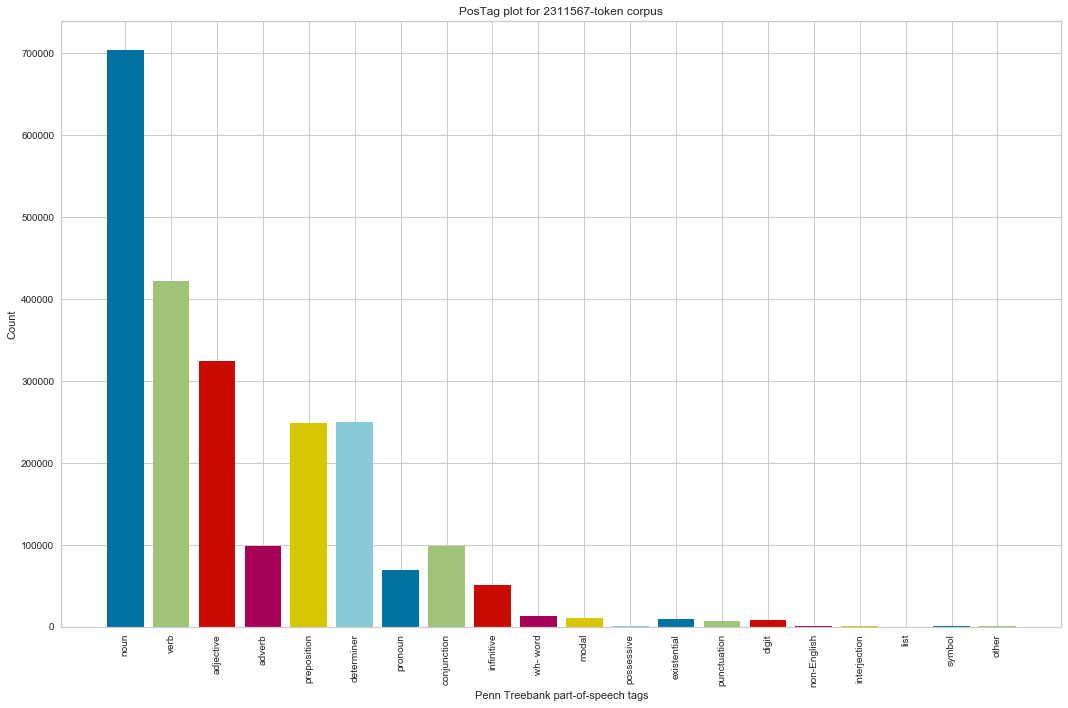

In [26]:
from yellowbrick.text import PosTagVisualizer

# # Create the visualizer, fit, score, and show it
viz = PosTagVisualizer(size=(1080, 720))
viz.fit(postags_plot)
viz.show(outpath="plots/tokens_plot_total_corpus.png")

In [27]:
# Selecting the nouns in our corpus
data['Nouns'] = data['POSTags'].apply(lambda x: [(t[0], t[1]) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])

data['Nouns']

0       [(subjective, NN), (female, NN), (presents, NN...
1       [(history, NN), (difficulty, NN), (stairs, NNS...
2       [(history, NN), (illness, NN), (i, NN), (abc, ...
3       [(m-mode, NN), (enlargement, NN), (diameter, N...
4       [(left, NN), (cavity, NN), (size, NN), (wall, ...
                              ...                        
4994    [(history, NN), (i, NN), (pleasure, NN), (meet...
4995    [(diagnosis, NN), (kawasaki, NN), (disease, NN...
4996    [(subjective, NN), (female, NN), (today, NN), ...
4997    [(complaint, NN), (male, NN), (presents, NNS),...
4998    [(history, NN), (male, NN), (presents, NNS), (...
Name: Nouns, Length: 4966, dtype: object

In [28]:
to_be_lemmatized = []

for nouns_per_medical_specialties in data['Nouns']:
    
    
    words2lemmatied = []
    for word in nouns_per_medical_specialties:
        words2lemmatied.append(word[0])
    
    to_be_lemmatized.append(words2lemmatied)


data['to_be_lemmatized'] = to_be_lemmatized
data['to_be_lemmatized']

0       [subjective, female, presents, complaint, alle...
1       [history, difficulty, stairs, difficulty, airl...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, presents, children, hospital...
4998    [history, male, presents, today, recommendatio...
Name: to_be_lemmatized, Length: 4966, dtype: object

In [29]:
from nltk.stem import WordNetLemmatizer

lmtzr = WordNetLemmatizer()

# print("rocks :", lmtzr.lemmatize("rocks"))

# for dd in data['to_be_lemmatized']:
#     lemma = lmtzr.lemmatize(dd[0])
#     print("%s Lemma:%s" %(dd[0], lemma))
data['lemmatize'] = data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])
print(data['lemmatize'])

# data['to_be_lemmatized'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])



0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [30]:
data.sample(5)

description  \
2990   The patient is admitted with a diagnosis of a...   
3186    Excisional biopsy of right cervical lymph node.   
2560   Bilateral breast MRI with & without IV contrast.   
655    Microscopic-assisted revision of bilateral de...   
4864   Abnormal EKG and rapid heart rate.  The patie...   

                medical_specialty                            sample_name  \
2990                   Nephrology           Nephrology Consultation - 4    
3186        Hematology - Oncology          Biopsy - Cervical Lymph Node    
2560      Obstetrics / Gynecology                        MRI Breast - 1    
655                       Surgery   Laminectomy & Foraminotomy Revision    
4864   Cardiovascular / Pulmonary                Consult - Abnormal EKG    

                                          transcription  \
2990  history the patient is a   -year-old male pati...   
3186  preoperative diagnosis cervical lymphadenopath...   
2560  findingsthere are post biopsy changes seen in ...   
655   preoperative diagnoses recurrent spinal stenos...   
4864  reason for consultation abnormal ekg and rapid...   

                                        tokenized_sents  \
2990  [history, the, patient, is, a, -year-old, male...   
3186  [preoperative, diagnosis, cervical, lymphadeno...   
2560  [findingsthere, are, post, biopsy, changes, se...   
655   [preoperative, diagnoses, recurrent, spinal, s...   
4864  [reason, for, consultation, abnormal, ekg, and...   

                                                POSTags  \
2990  [(history, NN), (the, DT), (patient, NN), (is,...   
3186  [(preoperative, JJ), (diagnosis, NN), (cervica...   
2560  [(findingsthere, RB), (are, VBP), (post, JJ), ...   
655   [(preoperative, JJ), (diagnoses, NNS), (recurr...   
4864  [(reason, NN), (for, IN), (consultation, NN), ...   

                                                  Nouns  \
2990  [(history, NN), (patient, NN), (patient, NN), ...   
3186  [(diagnosis, NN), (diagnosis, NN), (procedure,...   
2560  [(biopsy, NN), (changes, NNS), (region, NN), (...   
655   [(diagnoses, NNS), (stenosis, NN), (l, NN), (-...   
4864  [(reason, NN), (consultation, NN), (ekg, NN), ...   

                                       to_be_lemmatized  \
2990  [history, patient, patient, i, patient, blood,...   
3186  [diagnosis, diagnosis, procedure, biopsy, lymp...   
2560  [biopsy, changes, region, aspect, left, breast...   
655   [diagnoses, stenosis, l, -ll, -land, l, -s, sp...   
4864  [reason, consultation, ekg, heart, rate, histo...   

                                              lemmatize  
2990  [history, patient, patient, i, patient, blood,...  
3186  [diagnosis, diagnosis, procedure, biopsy, lymp...  
2560  [biopsy, change, region, aspect, left, breast,...  
655   [diagnosis, stenosis, l, -ll, -land, l, -s, sp...  
4864  [reason, consultation, ekg, heart, rate, histo...

In [31]:
print(data['lemmatize'])

0       [subjective, female, present, complaint, aller...
1       [history, difficulty, stair, difficulty, airli...
2       [history, illness, i, abc, today, gentleman, y...
3       [m-mode, enlargement, diameter, cm, size, righ...
4       [left, cavity, size, wall, thickness, wall, mo...
                              ...                        
4994    [history, i, pleasure, meeting, patient, today...
4995    [diagnosis, kawasaki, disease, discharge, diag...
4996    [subjective, female, today, physical, asthma, ...
4997    [complaint, male, present, child, hospital, em...
4998    [history, male, present, today, recommendation...
Name: lemmatize, Length: 4966, dtype: object


In [32]:
type(data['lemmatize'])

pandas.core.series.Series

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4966 non-null   object
 1   medical_specialty  4966 non-null   object
 2   sample_name        4966 non-null   object
 3   transcription      4966 non-null   object
 4   tokenized_sents    4966 non-null   object
 5   POSTags            4966 non-null   object
 6   Nouns              4966 non-null   object
 7   to_be_lemmatized   4966 non-null   object
 8   lemmatize          4966 non-null   object
dtypes: object(9)
memory usage: 548.0+ KB


In [34]:
len(data['lemmatize'][1])


129

In [35]:
data['lemmatize_count'] = data['lemmatize'].astype('str')
data['lemmatize_count']=data['lemmatize_count'].str.split().str.len()

In [36]:
data.sample(5)

description  \
2519         Ultrasound OB - followup for fetal growth.   
3362    Patient in with mom for possible ear infection.   
3658   Colonoscopy due to rectal bleeding, constipat...   
30     The patient noted for improving retention of ...   
3579                   EGD with dilation for dysphagia.   

             medical_specialty                     sample_name  \
2519   Obstetrics / Gynecology                  Ultrasound OB    
3362          General Medicine           Gen Med Consult - 23    
3658          Gastroenterology                Colonoscopy - 1    
30                     Urology   Urinary Retention - Followup    
3579          Gastroenterology              EGD with Dilation    

                                          transcription  \
2519  reason for exam followup for fetal growth     ...   
3362  subjective  mom brings the patient in today fo...   
3658  indication  rectal bleeding  constipation  abn...   
30    history of present illness the patient present...   
3579                                     indication       

                                        tokenized_sents  \
2519  [reason, for, exam, followup, for, fetal, grow...   
3362  [subjective, mom, brings, the, patient, in, to...   
3658  [indication, rectal, bleeding, constipation, a...   
30    [history, of, present, illness, the, patient, ...   
3579                                       [indication]   

                                                POSTags  \
2519  [(reason, NN), (for, IN), (exam, NN), (followu...   
3362  [(subjective, JJ), (mom, NN), (brings, VBZ), (...   
3658  [(indication, NN), (rectal, NN), (bleeding, VB...   
30    [(history, NN), (of, IN), (present, JJ), (illn...   
3579                                 [(indication, NN)]   

                                                  Nouns  \
2519  [(reason, NN), (exam, NN), (followup, NN), (gr...   
3362  [(mom, NN), (patient, NN), (today, NN), (infec...   
3658  [(indication, NN), (rectal, NN), (constipation...   
30    [(history, NN), (illness, NN), (patient, NN), ...   
3579                                 [(indication, NN)]   

                                       to_be_lemmatized  \
2519  [reason, exam, followup, growth, interpretatio...   
3362  [mom, patient, today, infection, ear, pain, to...   
3658  [indication, rectal, constipation, ct, rule, i...   
30    [history, illness, patient, presents, today, f...   
3579                                       [indication]   

                                              lemmatize  lemmatize_count  
2519  [reason, exam, followup, growth, interpretatio...               70  
3362  [mom, patient, today, infection, ear, pain, to...               81  
3658  [indication, rectal, constipation, ct, rule, i...               12  
30    [history, illness, patient, present, today, fo...               57  
3579                                       [indication]                1

In [37]:
del data['to_be_lemmatized']
del data['sample_name']

In [38]:
data.sample(5)

description  medical_specialty  \
239    Insertion of transesophageal echocardiography...            Surgery   
3596   Patient with a history of a Nissen fundoplica...   Gastroenterology   
546               Right nodular malignant mesothelioma.            Surgery   
3009   Acute on chronic renal failure and uremia.  I...         Nephrology   
732    Construction of right upper arm hemodialysis ...            Surgery   

                                          transcription  \
239   indications for procedure  impending open hear...   
3596  admitting diagnoses  hiatal hernia  gastroesop...   
546   preoperative diagnosis  right mesothelioma  po...   
3009  preoperative diagnoses acute on chronic renal ...   
732   preoperative diagnosis end-stage renal disease...   

                                        tokenized_sents  \
239   [indications, for, procedure, impending, open,...   
3596  [admitting, diagnoses, hiatal, hernia, gastroe...   
546   [preoperative, diagnosis, right, mesothelioma,...   
3009  [preoperative, diagnoses, acute, on, chronic, ...   
732   [preoperative, diagnosis, end-stage, renal, di...   

                                                POSTags  \
239   [(indications, NNS), (for, IN), (procedure, NN...   
3596  [(admitting, VBG), (diagnoses, NNS), (hiatal, ...   
546   [(preoperative, JJ), (diagnosis, NN), (right, ...   
3009  [(preoperative, JJ), (diagnoses, NNS), (acute,...   
732   [(preoperative, JJ), (diagnosis, NN), (end-sta...   

                                                  Nouns  \
239   [(indications, NNS), (procedure, NN), (heart, ...   
3596  [(diagnoses, NNS), (hernia, NN), (gastroesopha...   
546   [(diagnosis, NN), (diagnosis, NN), (lung, NN),...   
3009  [(diagnoses, NNS), (failure, NN), (diagnoses, ...   
732   [(diagnosis, NN), (disease, NN), (dialysis, NN...   

                                              lemmatize  lemmatize_count  
239   [indication, procedure, heart, surgery, closur...               97  
3596  [diagnosis, hernia, gastroesophageal, reflux, ...              140  
546   [diagnosis, diagnosis, lung, mass, diaphragm, ...              252  
3009  [diagnosis, failure, diagnosis, failure, proce...               91  
732   [diagnosis, disease, dialysis, fistula, diagno...              113

In [39]:
data.reset_index(drop=True)


description  \
0      A 23-year-old white female presents with comp...   
1              Consult for laparoscopic gastric bypass.   
2              Consult for laparoscopic gastric bypass.   
3                                2-D M-Mode. Doppler.     
4                                    2-D Echocardiogram   
...                                                 ...   
4961   Patient having severe sinusitis about two to ...   
4962   This is a 14-month-old baby boy Caucasian who...   
4963   A female for a complete physical and follow u...   
4964   Mother states he has been wheezing and coughing.   
4965   Acute allergic reaction, etiology uncertain, ...   

                medical_specialty  \
0            Allergy / Immunology   
1                      Bariatrics   
2                      Bariatrics   
3      Cardiovascular / Pulmonary   
4      Cardiovascular / Pulmonary   
...                           ...   
4961         Allergy / Immunology   
4962         Allergy / Immunology   
4963         Allergy / Immunology   
4964         Allergy / Immunology   
4965         Allergy / Immunology   

                                          transcription  \
0     subjective  this   -year-old white female pres...   
1     past medical history he has difficulty climbin...   
2     history of present illness i have seen abc tod...   
3      -d m-mode   left atrial enlargement with left...   
4      the left ventricular cavity size and wall thi...   
...                                                 ...   
4961  history  i had the pleasure of meeting and eva...   
4962  admitting diagnosis kawasaki disease  discharg...   
4963  subjective this is a   -year-old white female ...   
4964  chief complaint this  -year-old male presents ...   
4965  history a   -year-old male presents today self...   

                                        tokenized_sents  \
0     [subjective, this, -year-old, white, female, p...   
1     [past, medical, history, he, has, difficulty, ...   
2     [history, of, present, illness, i, have, seen,...   
3     [-d, m-mode, left, atrial, enlargement, with, ...   
4     [the, left, ventricular, cavity, size, and, wa...   
...                                                 ...   
4961  [history, i, had, the, pleasure, of, meeting, ...   
4962  [admitting, diagnosis, kawasaki, disease, disc...   
4963  [subjective, this, is, a, -year-old, white, fe...   
4964  [chief, complaint, this, -year-old, male, pres...   
4965  [history, a, -year-old, male, presents, today,...   

                                                POSTags  \
0     [(subjective, NN), (this, DT), (-year-old, JJ)...   
1     [(past, JJ), (medical, JJ), (history, NN), (he...   
2     [(history, NN), (of, IN), (present, JJ), (illn...   
3     [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...   
4     [(the, DT), (left, NN), (ventricular, JJ), (ca...   
...                                                 ...   
4961  [(history, NN), (i, NN), (had, VBD), (the, DT)...   
4962  [(admitting, VBG), (diagnosis, NN), (kawasaki,...   
4963  [(subjective, NN), (this, DT), (is, VBZ), (a, ...   
4964  [(chief, JJ), (complaint, NN), (this, DT), (-y...   
4965  [(history, NN), (a, DT), (-year-old, JJ), (mal...   

                                                  Nouns  \
0     [(subjective, NN), (female, NN), (presents, NN...   
1     [(history, NN), (difficulty, NN), (stairs, NNS...   
2     [(history, NN), (illness, NN), (i, NN), (abc, ...   
3     [(m-mode, NN), (enlargement, NN), (diameter, N...   
4     [(left, NN), (cavity, NN), (size, NN), (wall, ...   
...                                                 ...   
4961  [(history, NN), (i, NN), (pleasure, NN), (meet...   
4962  [(diagnosis, NN), (kawasaki, NN), (disease, NN...   
4963  [(subjective, NN), (female, NN), (today, NN), ...   
4964  [(complaint, NN), (male, NN), (presents, NNS),...   
4965  [(history, NN), (male, NN), (presents, NNS), (...   

                                              lemmatiz

In [40]:
# REACH GOAL
# from nltk.tokenize import sent_tokenize
# data["sent_token"] = data["transcription"].apply(lambda x: sent_tokenize(x))


In [41]:
from collections import Counter
dictionary= data['lemmatize'].transform(lambda x: Counter(x)).sum()
dictionary

for k in sorted(dictionary, key=dictionary.get, reverse=True):
    print(k, dictionary[k])

patient 23378
history 9438
procedure 7791
pain 5444
time 4927
/ 4878
i 4675
diagnosis 4522
incision 3905
blood 3803
room 3497
s 3329
day 3325
artery 3162
area 3091
skin 2939
medication 2765
mg 2757
suture 2744
extremity 2718
disease 2631
position 2630
tissue 2536
left 2490
pressure 2479
fashion 2441
x 2404
anesthesia 2311
surgery 2151
heart 2124
mass 2120
condition 2083
evidence 2075
examination 2057
operating 2055
abdomen 2022
muscle 1992
neck 1990
week 1987
lesion 1978
side 1973
catheter 1966
year 1926
complication 1889
level 1874
sign 1857
vicryl 1824
wound 1796
loss 1791
family 1759
risk 1746
care 1739
nerve 1733
symptom 1706
rate 1660
p 1652
head 1628
finding 1628
system 1607
eye 1597
change 1583
foot 1576
bone 1572
right 1548
dissection 1505
tube 1485
dr 1473
point 1461
plan 1459
problem 1458
difficulty 1448
bladder 1436
none 1403
lung 1397
treatment 1382
status 1376
cm 1364
today 1358
exam 1357
female 1351
chest 1340
hospital 1332
site 1328
bowel 1321
knee 1300
evaluation 1296
v

auscultation 148
hyperlipidemia 148
testing 148
name 147
station 147
collateral 147
observation 147
dizziness 147
tachycardia 147
prophylaxis 146
med 146
monitor 146
esmarch 146
entry 146
dementia 146
enlargement 145
pad 145
december 145
duodenum 144
naris 144
mixture 144
flexor 144
lymphadenopathy 143
mattress 143
transfer 143
score 143
dysuria 142
iron 142
velocity 142
adenopathy 141
dysphagia 141
ulceration 141
emg 141
surgeon 140
implantation 140
periosteum 140
interpretation 140
effort 140
tylenol 139
transplant 139
mucosal 139
qd 139
sample 138
loop 138
sweat 138
endoscope 138
osteoarthritis 137
roll 137
drape 137
’ 137
hemorrhoid 136
index 136
preparation 136
relief 136
extraction 136
rupture 136
immunization 135
dialysis 135
labor 135
pigtail 135
genitalia 134
mi 134
prominence 134
splint 134
ointment 133
liquid 133
tomorrow 133
fiber 133
nonsmoker 133
hepatosplenomegaly 133
_ 133
rale 132
window 132
infusion 132
gradient 131
arch 131
word 131
cn 131
identification 131
prognosi

metal 50
laxity 50
trochanter 50
hemovac 50
inpatient 50
tonsillitis 50
boot 50
consumption 50
vibration 50
inhaler 50
huntington 50
dry 49
opportunity 49
periphery 49
vaginalis 49
recheck 49
percocet 49
varicosity 49
ramus 49
front 49
burn 49
-cm 49
plateau 49
cutting 49
peg 49
smear 49
persistent 49
triangle 49
brainstem 49
oncology 49
phase 49
spondylolisthesis 49
nexium 49
sentence 49
advair 49
correlation 49
leaflet 48
rue 48
stabilization 48
university 48
torsion 48
dartos 48
zocor 48
tinnitus 48
nitroglycerin 48
penrose 48
mesoappendix 48
premature 48
retrobulbar 48
snare 48
bs 48
abds 48
purchase 48
augmentation 48
subscapularis 48
vulsellum 48
supraspinatus 48
atmosphere 48
keratome 48
creation 48
sclerosis 48
gastroscope 48
clonus 48
dad 48
ache 48
ativan 48
protonix 48
tab 48
serving 48
ventilation 47
manipulation 47
standpoint 47
scissor 47
caudal 47
ampulla 47
method 47
pulsation 47
glidewire 47
surgicel 47
hydration 47
city 47
chordee 47
configuration 47
bruising 47
peopl

straight 25
gastric 25
rex 25
tailor 25
orthopedics 25
footplate 25
bottle 25
tap 25
blepharoplasty 25
pathologist 25
corticosteroid 25
conference 25
grasp 25
photo 25
prematurity 25
accumulation 25
separation 25
distension 25
gastroparesis 25
inspiration 25
slice 25
ostomy 25
doughnut 25
infraspinatus 25
hyperventilation 25
guideline 25
augmentin 25
flagyl 25
glioma 25
gfr 25
hyperthyroidism 25
folate 25
lantus 25
sno 25
artifact 25
arthralgia 25
lle 25
incoordination 25
tid 25
personality 25
topamax 25
student 25
york 24
lipectomy 24
drawn 24
spermatocele 24
et 24
subdartos 24
adhesive 24
burden 24
soap 24
nodularity 24
thinking 24
premarin 24
clamped 24
miscarriage 24
submucosal 24
bulky 24
reference 24
valgus 24
vastus 24
lobule 24
empyema 24
purulence 24
dupuytren 24
intermetatarsal 24
texture 24
primary 24
enema 24
strep 24
stasis 24
monofilament 24
smas 24
fraying 24
macula 24
coil 24
variant 24
botulinum 24
gastrocnemius 24
blister 24
circle 24
ac 24
country 24
circumstance 24


nephrolithiasis 14
detorsion 14
crisis 14
ileal 14
scrotal 14
rapide 14
hematologic 14
oozing 14
pacer 14
/was 14
indentation 14
staphylococcus 14
inguinal 14
relocation 14
indigestion 14
inside 14
hive 14
mesentry 14
holiday 14
preoperative 14
reapproximation 14
deflation 14
caprosyn 14
pectoris 14
sensing 14
collagen 14
clotting 14
band-aid 14
hsv 14
hence 14
westcott 14
cholesteatoma 14
brachial 14
kit 14
pcl 14
biomet 14
reaming 14
anteversion 14
tensor 14
annulotomy 14
bulldog 14
neoplasia 14
salpingo-oophorectomy 14
file 14
arachnoid 14
selection 14
overlying 14
polypoid 14
flushing 14
eyebrow 14
circulatory 14
decannulation 14
salpingectomy 14
knuckle 14
arthroscope 14
folliculitis 14
sedative 14
infundibulum 14
cistern 14
septation 14
-pound 14
haptic 14
operative 14
mentation 14
sale 14
subclavian 14
cessation 14
quadratus 14
texas 14
palmaris 14
costal 14
hiatal 14
reserve 14
floxin 14
ivc 14
slap 14
continuity 14
hinge 14
sentinel 14
illumination 14
utility 14
retrieval 14
p

down 9
methylene 9
radiolucent 9
re-exploration 9
microtechniques 9
abg 9
histologic 9
danger 9
neuroforamen 9
cauda 9
equina 9
concavity 9
-month 9
bearing 9
noise 9
podiatry 9
durotomy 9
complement 9
staining 9
forefoot 9
ward 9
rescue 9
asynchrony 9
arthrogram 9
breech 9
pretarsal 9
lamella 9
erythromycin 9
azygos 9
sarcoma 9
astrocytoma 9
tag 9
blistering 9
tampon 9
indeterminate 9
lorenz 9
residual 9
adequacy 9
aggregate 9
efficiency 9
objective 9
jowl 9
micropore 9
sideburn 9
frontalis 9
shin 9
broviac 9
productive 9
programming 9
re-evaluation 9
cranial 9
deposition 9
pioneer 9
bengal 9
-cthen 9
caspar 9
-cwe 9
tongs 9
cand 9
imbalance 9
taxol 9
cracker 9
thrombocytosis 9
addiction 9
prolongation 9
rem 9
/mg 9
plaquenil 9
ritalin 9
tibc 9
iowa 9
spider 9
streak 9
mononeuritis 9
multiplex 9
hydroxyzine 9
everyday 9
glucophage 9
azotemia 9
homicidal 9
-calorie 9
eczema 9
-hour 9
midnight 9
warning 9
lvh 9
effexor 9
dream 9
teen 9
compatible 9
compressibility 9
lucency 9
glyburide 

tying 6
duramorph 6
mitomycin 6
trache 6
sternothyroid 6
stats 6
mg/ml 6
scoop 6
pusher 6
held 6
synvisc 6
charnley 6
trilogy 6
lateralis 6
restrictor 6
midsection 6
myomectomy 6
stentless 6
sullivan 6
ray-tec 6
ropivacaine 6
wand 6
mucoperiosteum 6
suppression 6
external 6
cradle 6
vertebral 6
snugness 6
t-fasteners 6
bronchiole 6
yankauer 6
sma 6
thoracoport 6
below 6
midpalm 6
tenosynovium 6
uterosacrals 6
roticulator 6
mccall 6
culdoplasty 6
gyn/balfour 6
green 6
rinse 6
washout 6
timeout 6
stamm 6
pop-offs 6
visibility 6
piston 6
essence 6
mua 6
zigzag 6
scaphoid 6
bone/middle 6
dirty 6
torus 6
tubarius 6
orbital 6
codman 6
shockwave 6
copeland 6
portnoy 6
endogen 6
septoplasty 6
osteotomes 6
non-st-elevation 6
cl 6
buddy 6
auricular 6
aperture 6
scott 6
ethmoidectomy 6
placud 6
canthal 6
stellate 6
eyelash 6
oc 6
lithotomy 6
valvuloplasty 6
cardiology/cardiothoracic 6
ligaclips 6
macular 6
born 6
context 6
occluder 6
cardiologic 6
port-a-catheter 6
butterfly 6
coblation 6
prolact

avoid 5
turning 5
atacand 5
ammonia 5
hyperinflation 5
victoria 5
gym 5
suffering 5
nitro 5
guaifenesin 5
tto 5
toe-heel 5
spiriva 5
resolving 5
cruise 5
potato 5
seroma 5
sponsor 5
educator 5
glucometer 5
neither 5
scooter 5
booklet 5
topic 5
hemianopsia 5
forth 5
indocin 5
treat 5
doll 5
dynamic 5
harder 5
electron 5
bicuspid 5
qt 5
cyclosporine 5
byetta 5
wakefulness 5
lotensin 5
narrow 5
nasonex 5
gender 5
orthotropia 5
darker 5
low-attenuation 5
+/patellae 5
nb 5
farmer 5
pericardiocentesis 5
sole 5
emg/ncv 5
myelitis 5
leptomeningeal 5
dsdna 5
weighting 5
histiocyte 5
-/strength 5
tw 5
+/achilles 5
fttsh 5
somatosensory 5
encephalitis 5
qhours 5
jerking 5
neurosurgeon 5
dexterity 5
kitchen 5
gastrectomy 5
olfactory 5
pf 5
apb 5
hyporeflexia 5
hba 5
phlebolith 5
spiral 5
anticonvulsant 5
mechanic 5
shadow 5
population 5
reperfusion 5
decade 5
hemisensory 5
authority 5
coordinator 5
restaurant 5
provigil 5
distractibility 5
washington 5
orange 5
mania 5
alcoholic 5
tangentiality 5


guttata 4
iop 4
/os 4
pinholing 4
fovea 4
/od 4
suggests 4
stickler 4
know 4
hard 4
trochanteric 4
lips/teeth/gums 4
nephrosclerosis 4
twitching 4
homeless 4
ptu 4
anginal 4
infrequent 4
locomotor 4
flovent 4
cin 4
yaz 4
vaginosis 4
allergies/intolerances 4
lactaid 4
penicillamine 4
cerebrovascular 4
fosphenytoin 4
epilepticus 4
modesto 4
rst 4
wilmer 4
allergy/immunology 4
midodrine 4
perivascular 4
emg/nerve 4
pentagon 4
paratonia 4
polio 4
dysnomia 4
registration 4
myotonia 4
paramyotonia 4
neuroforamining 4
dysphasia 4
regrowth 4
update 4
quivering 4
varicella 4
tft 4
catherization 4
medsnone 4
constant 4
yo 4
upgaze 4
miller-fisher 4
baclofen 4
primidone 4
apart 4
sidewalk 4
sits 4
blush 4
hopkins 4
lamotrigine 4
carbatrol 4
mute 4
cruz 4
immunomodulatory 4
antimicrobial 4
custodian 4
levophed 4
thymoglobulin 4
promise 4
accupril 4
consulting 4
cost 4
pleomorphic/giant 4
sarcomatoid 4
diagnosisa 4
gripping 4
froi 4
exists 4
/pounds 4
apportionment 4
pci/cabg 4
concentrate 4
librar

chrysler 3
vigilant 3
concise 3
loneliness 3
euphoria 3
gustatory 3
derealizations 3
irrelevance 3
evasiveness 3
guilt 3
concreteness 3
preoccupation 3
complies 3
empathy 3
affection 3
egocentricity 3
controllingness 3
intimidation 3
credibility 3
self-injury 3
reliability 3
self-report 3
precipitating 3
mca/cva 3
sinai 3
camcorder 3
algebra 3
quire 3
knitting 3
bahamas 3
subside 3
hermann 3
microwave 3
hypomanic 3
self-prescribing 3
fexofenadine 3
benzo 3
milieu 3
nevada 3
lxv 3
antichrist 3
neighborhood 3
telepathy 3
anti-psychotics 3
psychotic 3
feldene 3
minipress 3
/one 3
senokot 3
georgia 3
collarbone 3
barefoot 3
reliance 3
peri-colace 3
dyscoordination 3
receptive 3
younger 3
stooling 3
dada 3
duskiness 3
loud 3
cow 3
wheat 3
preregistration 3
myringtomy 3
high-frequency 3
wiggle 3
shunting 3
owe 3
rapid 3
caucasian 3
fussiness 3
-weeker 3
papillomavirus 3
intensivist 3
infantile 3
carnitine 3
wresting 3
yearly 3
tart 3
sandwich 3
examheight/weight 3
cue 3
peerla 3
jumping 3
me

dynagraft 2
innovation 2
intrathenar 2
homeostasis 2
frykman 2
comminutions 2
-this 2
revise 2
proceeds 2
handset 2
jones-type 2
point-of-reduction 2
upright 2
k-pad 2
side-inlet 2
conforming 2
cholecystogram 2
transrectus 2
venodynes 2
cardioesophageal 2
adaptor 2
liberation 2
flaccida 2
mesoesophagus 2
retroesophageal 2
surgi-bra 2
orogastric 2
halfway 2
ablative 2
visiport 2
fenoldopam 2
/visiport 2
/trocar 2
gluconate 2
webspace 2
twelfth 2
eleventh 2
covering 2
a-line 2
stabilize 2
intimate 2
digastric 2
halitosis 2
submucoperichondrial 2
storz 2
whipstitch 2
drying 2
outcome/result 2
playing 2
gouge 2
approximate 2
shepard 2
neurosensory 2
perfection 2
mid-stenosis 2
overlapping 2
rewires 2
post-dilatation 2
reuter 2
annuloplasty 2
cosgrove 2
galloway 2
fuser 2
sondergaard 2
chordae 2
mumford 2
systolics 2
langer 2
acromioplasty 2
crevice 2
fisch 2
stapedectomy 2
hub 2
microsuspension 2
sporadic 2
droopy 2
histopathologic 2
rootlet 2
taking 2
grooving 2
binder 2
microfacial 2
met

posttransplant 2
allotransplant 2
cvp 2
m-bacod 2
minister 2
etoposide 2
soriatane 2
estep 2
mapleridge 2
taco 2
nasopharyngeal 2
near-falls 2
systemsendocrine 2
sswithout 2
douloureux 2
abdominopelvic 2
phenobarbitone 2
systemsbones 2
mill 2
ku 2
housekeeper 2
compliant 2
like 2
coincidence 2
flint 2
anymore 2
lunchtime 2
connie 2
paroxetine 2
atripla 2
dilatrate 2
pterygium 2
zostrix 2
-day 2
gram-stain 2
niddm 2
mavik 2
tarka 2
bodyaches 2
bronchitis/uri 2
bind 2
luck 2
draw 2
dispatcher 2
ferguson 2
roszhart 2
hamburger 2
gatorade 2
kaopectate 2
perla 2
mail 2
bug 2
pro-time 2
nc/t 2
baylis 2
cheng 2
monopril 2
lunknown 2
adjusts 2
gill 2
accu-cheks 2
allergies/history 2
rast 2
sniffle 2
rhytids 2
gastroc-soleus 2
lamisil 2
cleansing 2
symlin 2
carb/insulin 2
nonacute 2
leucocytosis 2
epo 2
residency 2
ongoing 2
fnp 2
burdensome 2
cystectomies 2
assessmentosteoarthritis 2
recommendationsagree 2
nph 2
chondroitin/glucosamine 2
nt 2
hsm 2
oa 2
nephrosis 2
-hydroxy-vitamin 2
mucosus 2

spasm/calf 2
pt/ot 2
cascade 2
plus 2
flexion/extension 2
evaluation/treatment 2
op 2
convalescence 2
iredell 2
pediatric 2
paleness 2
rhizotomy 2
diclofenac 2
pinching 2
porthole 2
ballottement 2
grind 2
flector 2
relafen 2
agrees 2
abducto 2
feasibility 2
clicking 2
mango 2
teratoma 2
shake 2
-wheeler 2
workman 2
comp 2
erector 2
evaluation/recommendation 2
re-aggravation 2
unloading 2
wpi 2
recombinant 2
morbidity/mortality 2
angola 2
syphilis 2
synechia 2
cyclomydril 2
samplesample 2
handheld 2
magnifier 2
alevels 2
meshwork 2
gonio-compression 2
gdx 2
applanations 2
conj 2
cup-to-disc 2
fuchs 2
tonometry 2
stroma 2
endothelium 2
/ou 2
finalod 2
fresnel 2
pityrosporum 2
goldberg 2
presbyopia 2
commence 2
preservision 2
capulets 2
humphrey 2
eltroxin 2
plendil 2
make-up 2
myopia 2
osteodystrophy 2
guy 2
corpsman 2
reminds 2
tomato 2
sauce 2
glad 2
walgreens 2
depo-provera 2
polyspike 2
demeanor 2
precursor 2
adeno 2
cornealis 2
radioiodine 2
propylthiouracil 2
exophthalmus 2
huffman

followsotoscopy 2
vestibulocular 2
palatine 2
pronunciation 2
gasping 2
altitude 2
microlaryngoscopy 2
kantor 2
prominent 2
immobile 2
peritonsillar 2
monospot 2
sophomore 2
systemsent 2
covington 2
eacs 2
non-mono 2
foul 2
receptionist 2
audiologist 2
aq 2
counsel 2
audio 2
muskegon 2
reception 2
+/they 2
trismus 2
nicorette 2
carpenter 2
hypogeusia 2
hashimoto 2
thyroiditis 2
thunder 2
microfractures 2
sensor 2
picu 2
diagnosisevaluation 2
haggard 2
suboptimal 2
tridil 2
-bicarb 2
facilitate 2
respirator 2
blockade 2
smv 2
anuria 2
vaporizer 2
boarder 2
history/illnesses 2
plans/recommendations 2
hypercapnia 2
eureka 2
diflucan 2
medications/instructions 2
snf 2
ursodiol 2
de-colonization 2
wheezings 2
preadmission 2
humibid 2
diagnosisrespiratory 2
innocent 2
perihilar 2
coarseness 2
fireplace 2
barbecue 2
bathe 2
psychology 2
netherlands 2
characterizes 2
proliferation 2
bin 2
milder 2
photosensitivity 2
europe 2
mpo 2
ige 2
asca 2
anti-ompc 2
gliadin 2
aortocaval 2
meanwhile 2
bwi

In [42]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# data['post_stopwords'] = data['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop])
# data.sample(5)

In [43]:
data['tokenized_sents']=data['tokenized_sents'].astype('str')
data['tokenized_sents']

0       ['subjective', 'this', '-year-old', 'white', '...
1       ['past', 'medical', 'history', 'he', 'has', 'd...
2       ['history', 'of', 'present', 'illness', 'i', '...
3       ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...
4       ['the', 'left', 'ventricular', 'cavity', 'size...
                              ...                        
4994    ['history', 'i', 'had', 'the', 'pleasure', 'of...
4995    ['admitting', 'diagnosis', 'kawasaki', 'diseas...
4996    ['subjective', 'this', 'is', 'a', '-year-old',...
4997    ['chief', 'complaint', 'this', '-year-old', 'm...
4998    ['history', 'a', '-year-old', 'male', 'present...
Name: tokenized_sents, Length: 4966, dtype: object

In [44]:
data['tokens'] = data['tokenized_sents'].str.split().str.len()
data.sample(5)

description  \
3998   Skin biopsy, scalp mole.  Darkened mole statu...   
2108   Open reduction and internal fixation, high gr...   
1239   Anterior cervical discectomy and osteophytect...   
4137   Patient presents for treatment of suspected r...   
99     Direct right inguinal hernia.  Marlex repair ...   

                medical_specialty  \
3998                  Dermatology   
2108                   Orthopedic   
1239                      Surgery   
4137   Consult - History and Phy.   
99                        Urology   

                                          transcription  \
3998  procedure skin biopsy  scalp mole  indication ...   
2108  preoperative diagnosis severely comminuted fra...   
1239  preoperative diagnoses  cervical radiculopathy...   
4137  chief complaint  this year old male presents t...   
99    preoperative diagnosis right inguinal hernia  ...   

                                        tokenized_sents  \
3998  ['procedure', 'skin', 'biopsy', 'scalp', 'mole...   
2108  ['preoperative', 'diagnosis', 'severely', 'com...   
1239  ['preoperative', 'diagnoses', 'cervical', 'rad...   
4137  ['chief', 'complaint', 'this', 'year', 'old', ...   
99    ['preoperative', 'diagnosis', 'right', 'inguin...   

                                                POSTags  \
3998  [(procedure, NN), (skin, NN), (biopsy, NN), (s...   
2108  [(preoperative, JJ), (diagnosis, NN), (severel...   
1239  [(preoperative, JJ), (diagnoses, NNS), (cervic...   
4137  [(chief, JJ), (complaint, NN), (this, DT), (ye...   
99    [(preoperative, JJ), (diagnosis, NN), (right, ...   

                                                  Nouns  \
3998  [(procedure, NN), (skin, NN), (biopsy, NN), (i...   
2108  [(diagnosis, NN), (fracture, NN), (radius, NN)...   
1239  [(diagnoses, NNS), (c, NN), (-c, NN), (-c, NNP...   
4137  [(complaint, NN), (year, NN), (male, NN), (pre...   
99    [(diagnosis, NN), (hernia, NN), (diagnosis, NN...   

                                              lemmatize  lemmatize_count  \
3998  [procedure, skin, biopsy, indication, female, ...               43   
2108  [diagnosis, fracture, radius, diagnosis, fract...              199   
1239  [diagnosis, c, -c, -c, spondylosis, c, -c, -c,...              340   
4137  [complaint, year, male, present, today, treatm...              279   
99    [diagnosis, hernia, diagnosis, inguinal, herni...               79   

      tokens  
3998     103  
2108     734  
1239    1038  
4137     626  
99       282

In [45]:
data['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [46]:
#disproportion of corpora
data['medical_specialty'].value_counts()

 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
 Podiatry                           47
 Dermatology                        29
 Dentistry                          27
 Cosmetic / Plastic Surge

In [47]:
data['medical_specialty'].nunique()

40

In [48]:
# columns_to_remove = [' Office Notes',  'SOAP / Chart / Progress Notes', 'Letters', 'IME-QME-Work Comp etc.','Hospice - Palliative Care',' Discharge Summary' ]

# med_specialties= data['medical_specialty']

# for column in med_specialties:
#     med_specialties != columns_to_remove

In [49]:
data = data[(data['medical_specialty'] != ' Discharge Summary')& 
            (data['medical_specialty'] != ' Office Notes') & 
            (data['medical_specialty'] != ' SOAP / Chart / Progress Notes') &
            (data['medical_specialty'] != ' Letters') &
            (data['medical_specialty'] != ' IME-QME-Work Comp etc.') &
           (data['medical_specialty'] != ' Hospice - Palliative Care')&
           (data['medical_specialty'] != ' Emergency Room Reports') &
            (data['medical_specialty'] != ' Autopsy')]
data

description  \
0      A 23-year-old white female presents with comp...   
1              Consult for laparoscopic gastric bypass.   
2              Consult for laparoscopic gastric bypass.   
3                                2-D M-Mode. Doppler.     
4                                    2-D Echocardiogram   
...                                                 ...   
4994   Patient having severe sinusitis about two to ...   
4995   This is a 14-month-old baby boy Caucasian who...   
4996   A female for a complete physical and follow u...   
4997   Mother states he has been wheezing and coughing.   
4998   Acute allergic reaction, etiology uncertain, ...   

                medical_specialty  \
0            Allergy / Immunology   
1                      Bariatrics   
2                      Bariatrics   
3      Cardiovascular / Pulmonary   
4      Cardiovascular / Pulmonary   
...                           ...   
4994         Allergy / Immunology   
4995         Allergy / Immunology   
4996         Allergy / Immunology   
4997         Allergy / Immunology   
4998         Allergy / Immunology   

                                          transcription  \
0     subjective  this   -year-old white female pres...   
1     past medical history he has difficulty climbin...   
2     history of present illness i have seen abc tod...   
3      -d m-mode   left atrial enlargement with left...   
4      the left ventricular cavity size and wall thi...   
...                                                 ...   
4994  history  i had the pleasure of meeting and eva...   
4995  admitting diagnosis kawasaki disease  discharg...   
4996  subjective this is a   -year-old white female ...   
4997  chief complaint this  -year-old male presents ...   
4998  history a   -year-old male presents today self...   

                                        tokenized_sents  \
0     ['subjective', 'this', '-year-old', 'white', '...   
1     ['past', 'medical', 'history', 'he', 'has', 'd...   
2     ['history', 'of', 'present', 'illness', 'i', '...   
3     ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...   
4     ['the', 'left', 'ventricular', 'cavity', 'size...   
...                                                 ...   
4994  ['history', 'i', 'had', 'the', 'pleasure', 'of...   
4995  ['admitting', 'diagnosis', 'kawasaki', 'diseas...   
4996  ['subjective', 'this', 'is', 'a', '-year-old',...   
4997  ['chief', 'complaint', 'this', '-year-old', 'm...   
4998  ['history', 'a', '-year-old', 'male', 'present...   

                                                POSTags  \
0     [(subjective, NN), (this, DT), (-year-old, JJ)...   
1     [(past, JJ), (medical, JJ), (history, NN), (he...   
2     [(history, NN), (of, IN), (present, JJ), (illn...   
3     [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...   
4     [(the, DT), (left, NN), (ventricular, JJ), (ca...   
...                                                 ...   
4994  [(history, NN), (i, NN), (had, VBD), (the, DT)...   
4995  [(admitting, VBG), (diagnosis, NN), (kawasaki,...   
4996  [(subjective, NN), (this, DT), (is, VBZ), (a, ...   
4997  [(chief, JJ), (complaint, NN), (this, DT), (-y...   
4998  [(history, NN), (a, DT), (-year-old, JJ), (mal...   

                                                  Nouns  \
0     [(subjective, NN), (female, NN), (presents, NN...   
1     [(history, NN), (difficulty, NN), (stairs, NNS...   
2     [(history, NN), (illness, NN), (i, NN), (abc, ...   
3     [(m-mode, NN), (enlargement, NN), (diameter, N...   
4     [(left, NN), (cavity, NN), (size, NN), (wall, ...   
...                                                 ...   
4994  [(history, NN), (i, NN), (pleasure, NN), (meet...   
4995  [(diagnosis, NN), (kawasaki, NN), (disease, NN...   
4996  [(subjective, NN), (female, NN), (today, NN), ...   
4997  [(complaint, NN), (male, NN), (presents, NNS),...   
4998  [(history, NN), (male, NN), (presents, NNS), (...   

                                              lemmatiz

In [50]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].mean())
print(data['lemmatize_count'].median())

142.3143553389455
126.0


In [51]:
#Getting the mean and median across all tokens 
print(data['lemmatize_count'].max())
print(data['lemmatize_count'].min())

837
1


In [52]:
data['lemmatize_count'].value_counts().sample(50)

308     2
9       3
128    17
393     2
194    13
217    13
4       2
223    11
292     4
361     4
272     4
332     2
22     11
356     3
261     4
16      8
206     9
286     9
227    12
340     5
87     24
131    22
55     21
112    21
24      7
179    14
31      9
343     2
249     2
290     5
73     18
307     8
390     1
164    16
455     2
320     5
57     19
153    18
130    17
44     17
81     27
50     18
297     9
46     24
23      8
134    37
196     9
363     2
395     1
72     16
Name: lemmatize_count, dtype: int64

In [53]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


count        mean  median
medical_specialty                                     
 Surgery                      1088  141.045956   121.0
 Consult - History and Phy.    516  175.926357   157.0
 Cardiovascular / Pulmonary    371  134.840970   119.0
 Orthopedic                    355  168.309859   154.0
 Radiology                     273   93.575092    77.0
 General Medicine              259  148.965251   138.0
 Gastroenterology              224  109.709821    93.0
 Neurology                     223  155.430493   142.0
 Urology                       156  119.288462   105.0
 Obstetrics / Gynecology       155  137.567742   125.0
 ENT - Otolaryngology           96  129.385417   109.5
 Neurosurgery                   94  170.670213   146.0
 Hematology - Oncology          90  127.855556   102.0
 Ophthalmology                  83  108.903614   101.0
 Nephrology                     81  131.172840   121.0
 Pediatrics - Neonatal          70  141.142857   132.0
 Pain Management                61   77.426230    64.0
 Psychiatry / Psychology        53  230.754717   199.0
 Podiatry                       47  144.085106   136.0
 Dermatology                    29  125.034483    87.0
 Cosmetic / Plastic Surgery     27  155.740741   162.0
 Dentistry                      27  149.555556   127.0
 Physical Medicine - Rehab      21  141.904762   128.0
 Sleep Medicine                 20   94.000000    60.5
 Endocrinology                  19  189.894737   185.0
 Bariatrics                     18  121.888889    97.0
 Chiropractic                   14  276.500000   221.0
 Diets and Nutritions           10  115.600000   129.5
 Rheumatology                   10  152.400000   140.5
 Speech - Language               9  125.666667   130.0
 Lab Medicine - Pathology        8   85.750000    88.0
 Allergy / Immunology            7  137.142857   136.0

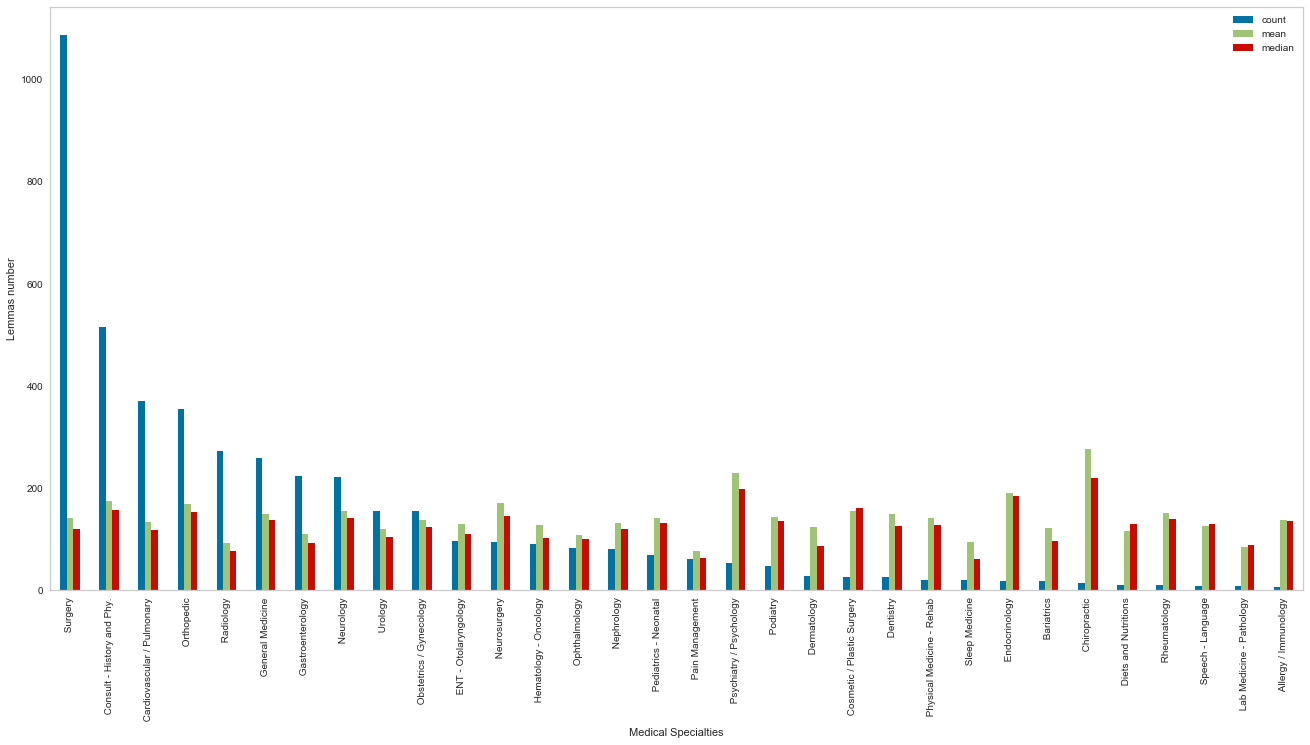

In [54]:
# A good snapshot: in our corpus there is a great number of texts for Surgery, but for practices like Psychiatry and 
#Immunology very few. Nonetheless, mean and median of tokes are high for those categories, which means that the corpora
#are long
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)

In [55]:
#Decided to group some categories in sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
# # Combining similar offenses together
data = data.replace({' Sleep Medicine': " Sleep and Pain", ' Pain Management': " Sleep and Pain"})
data

description  \
0      A 23-year-old white female presents with comp...   
1              Consult for laparoscopic gastric bypass.   
2              Consult for laparoscopic gastric bypass.   
3                                2-D M-Mode. Doppler.     
4                                    2-D Echocardiogram   
...                                                 ...   
4994   Patient having severe sinusitis about two to ...   
4995   This is a 14-month-old baby boy Caucasian who...   
4996   A female for a complete physical and follow u...   
4997   Mother states he has been wheezing and coughing.   
4998   Acute allergic reaction, etiology uncertain, ...   

                medical_specialty  \
0            Allergy / Immunology   
1                      Bariatrics   
2                      Bariatrics   
3      Cardiovascular / Pulmonary   
4      Cardiovascular / Pulmonary   
...                           ...   
4994         Allergy / Immunology   
4995         Allergy / Immunology   
4996         Allergy / Immunology   
4997         Allergy / Immunology   
4998         Allergy / Immunology   

                                          transcription  \
0     subjective  this   -year-old white female pres...   
1     past medical history he has difficulty climbin...   
2     history of present illness i have seen abc tod...   
3      -d m-mode   left atrial enlargement with left...   
4      the left ventricular cavity size and wall thi...   
...                                                 ...   
4994  history  i had the pleasure of meeting and eva...   
4995  admitting diagnosis kawasaki disease  discharg...   
4996  subjective this is a   -year-old white female ...   
4997  chief complaint this  -year-old male presents ...   
4998  history a   -year-old male presents today self...   

                                        tokenized_sents  \
0     ['subjective', 'this', '-year-old', 'white', '...   
1     ['past', 'medical', 'history', 'he', 'has', 'd...   
2     ['history', 'of', 'present', 'illness', 'i', '...   
3     ['-d', 'm-mode', 'left', 'atrial', 'enlargemen...   
4     ['the', 'left', 'ventricular', 'cavity', 'size...   
...                                                 ...   
4994  ['history', 'i', 'had', 'the', 'pleasure', 'of...   
4995  ['admitting', 'diagnosis', 'kawasaki', 'diseas...   
4996  ['subjective', 'this', 'is', 'a', '-year-old',...   
4997  ['chief', 'complaint', 'this', '-year-old', 'm...   
4998  ['history', 'a', '-year-old', 'male', 'present...   

                                                POSTags  \
0     [(subjective, NN), (this, DT), (-year-old, JJ)...   
1     [(past, JJ), (medical, JJ), (history, NN), (he...   
2     [(history, NN), (of, IN), (present, JJ), (illn...   
3     [(-d, JJ), (m-mode, NN), (left, VBD), (atrial,...   
4     [(the, DT), (left, NN), (ventricular, JJ), (ca...   
...                                                 ...   
4994  [(history, NN), (i, NN), (had, VBD), (the, DT)...   
4995  [(admitting, VBG), (diagnosis, NN), (kawasaki,...   
4996  [(subjective, NN), (this, DT), (is, VBZ), (a, ...   
4997  [(chief, JJ), (complaint, NN), (this, DT), (-y...   
4998  [(history, NN), (a, DT), (-year-old, JJ), (mal...   

                                                  Nouns  \
0     [(subjective, NN), (female, NN), (presents, NN...   
1     [(history, NN), (difficulty, NN), (stairs, NNS...   
2     [(history, NN), (illness, NN), (i, NN), (abc, ...   
3     [(m-mode, NN), (enlargement, NN), (diameter, N...   
4     [(left, NN), (cavity, NN), (size, NN), (wall, ...   
...                                                 ...   
4994  [(history, NN), (i, NN), (pleasure, NN), (meet...   
4995  [(diagnosis, NN), (kawasaki, NN), (disease, NN...   
4996  [(subjective, NN), (female, NN), (today, NN), ...   
4997  [(complaint, NN), (male, NN), (presents, NNS),...   
4998  [(history, NN), (male, NN), (presents, NNS), (...   

                                              lemmatiz

In [56]:
# # Combining similar offenses together
#Group sleep and Pain, Dermatology and Cosmetic Surgery In SKIN cosmetics, Chiropratic and Phisical med Rehab, 
#Bariatrics and Nutritions in Dietology,                
# data = data.replace({' Sleep Medicine': 'Sleep and Pain', ' Pain Management': 'Sleep and Pain'})
# data
data = data.replace({' Cosmetic / Plastic Surgery': " SKIN cosmetics", ' Dermatology': " SKIN cosmetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Dentistry                       27
 Physical Medicine - Rehab       21
 Endocrinology                   19
 Bariatrics                      18
 Chiropractic                    14
 Rheumatology                    10
 Diets and Nutritions            10
 Speech - Language          

In [57]:
data = data.replace({' Chiropractic': " Physical Therapy", ' Physical Medicine - Rehab': " Physical Therapy"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dentistry                       27
 Endocrinology                   19
 Bariatrics                      18
 Diets and Nutritions            10
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology   

In [58]:
data = data.replace({' Bariatrics': " Dietetics", ' Diets and Nutritions': " Dietetics"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Neurology                      223
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Neurosurgery                    94
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology       

In [59]:
data = data.replace({' Neurology': " Neurologists", ' Neurosurgery': " Neurologists"})
data['medical_specialty'].value_counts()

 Surgery                       1088
 Consult - History and Phy.     516
 Cardiovascular / Pulmonary     371
 Orthopedic                     355
 Neurologists                   317
 Radiology                      273
 General Medicine               259
 Gastroenterology               224
 Urology                        156
 Obstetrics / Gynecology        155
 ENT - Otolaryngology            96
 Hematology - Oncology           90
 Ophthalmology                   83
 Nephrology                      81
 Sleep and Pain                  81
 Pediatrics - Neonatal           70
 SKIN cosmetics                  56
 Psychiatry / Psychology         53
 Podiatry                        47
 Physical Therapy                35
 Dietetics                       28
 Dentistry                       27
 Endocrinology                   19
 Rheumatology                    10
 Speech - Language                9
 Lab Medicine - Pathology         8
 Allergy / Immunology             7
Name: medical_specialty, dty

In [60]:
# Final count of medical specialties (for now)
data = data.replace({' Lab Medicine - Pathology': " Pathology"})
data['medical_specialty'].nunique()

27

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   description        4514 non-null   object
 1   medical_specialty  4514 non-null   object
 2   transcription      4514 non-null   object
 3   tokenized_sents    4514 non-null   object
 4   POSTags            4514 non-null   object
 5   Nouns              4514 non-null   object
 6   lemmatize          4514 non-null   object
 7   lemmatize_count    4514 non-null   int64 
 8   tokens             4514 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 512.7+ KB


In [62]:
#Setting a cutoff lowerbound (250 tokens) and upperbound (1000) for the number of Lemma
data = data[(data['lemmatize_count'] >= 60) & (data['lemmatize_count'] <= 250)]
print(data['lemmatize_count'].min())
print(data['lemmatize_count'].max())

60
250


In [63]:
data['medical_specialty'].nunique()

27

In [64]:
data['medical_specialty'].value_counts()

 Surgery                       818
 Consult - History and Phy.    396
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [65]:
print(data['tokens'].min())
print(data['tokens'].max())

102
969


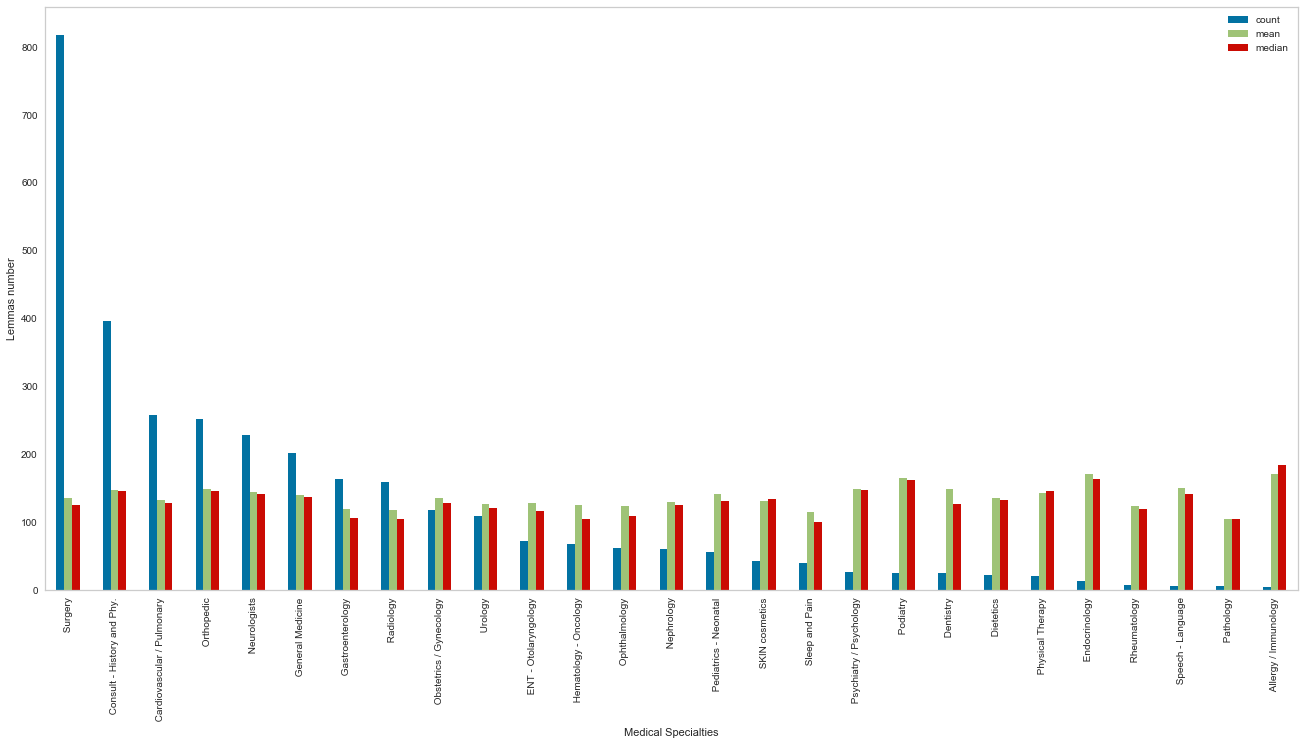

In [66]:
# Cleaned snapshot
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False).plot(kind='bar', figsize=(20,10))
plt.ylabel("Lemmas number" )
plt.xlabel("Medical Specialties")
plt.grid()
plt.xticks(rotation = 90)
plt.legend(fancybox= True)
plt.savefig('plots/Corpus_view_with_Lemmas_after_first_reduction.png')

In [67]:
data.groupby('medical_specialty')['lemmatize_count'].agg(['count', 'mean', 'median']).sort_values(by='count',ascending = False)


count        mean  median
medical_specialty                                     
 Surgery                       818  135.343521   126.0
 Consult - History and Phy.    396  148.030303   147.0
 Cardiovascular / Pulmonary    259  133.833977   128.0
 Orthopedic                    253  149.185771   146.0
 Neurologists                  229  144.510917   142.0
 General Medicine              203  141.093596   138.0
 Gastroenterology              164  119.542683   107.0
 Radiology                     160  117.881250   105.0
 Obstetrics / Gynecology       119  136.781513   129.0
 Urology                       109  127.366972   122.0
 ENT - Otolaryngology           72  129.375000   117.0
 Hematology - Oncology          68  125.485294   105.0
 Ophthalmology                  63  123.873016   109.0
 Nephrology                     61  129.590164   126.0
 Pediatrics - Neonatal          57  141.719298   132.0
 SKIN cosmetics                 44  132.250000   134.0
 Sleep and Pain                 41  114.756098   100.0
 Psychiatry / Psychology        27  148.592593   148.0
 Podiatry                       25  165.400000   163.0
 Dentistry                      25  148.960000   127.0
 Dietetics                      23  135.347826   133.0
 Physical Therapy               21  143.904762   147.0
 Endocrinology                  14  171.571429   164.5
 Rheumatology                    8  124.000000   119.5
 Speech - Language               7  150.142857   142.0
 Pathology                       6  105.666667   105.0
 Allergy / Immunology            5  171.200000   185.0

In [68]:
data.sample(5)

description  \
1734   Cardiolite treadmill exercise stress test.  T...   
4321   Local reaction secondary to insect sting.  Pa...   
2400   Cataract, right eye.  Phacoemulsification wit...   
4056   Nipple areolar reconstruction utilizing a ful...   
2217                Hardware removal in the left elbow.   

                medical_specialty  \
1734                    Radiology   
4321   Consult - History and Phy.   
2400                Ophthalmology   
4056               SKIN cosmetics   
2217                   Orthopedic   

                                          transcription  \
1734  cardiolite treadmill exercise stress test clin...   
4321  history of present illness  patient is a   -ye...   
2400  preoperative diagnosis cataract  right eye  po...   
4056  preoperative diagnoses  surgical absence of le...   
2217  preoperative diagnosis retained hardware in le...   

                                        tokenized_sents  \
1734  ['cardiolite', 'treadmill', 'exercise', 'stres...   
4321  ['history', 'of', 'present', 'illness', 'patie...   
2400  ['preoperative', 'diagnosis', 'cataract', 'rig...   
4056  ['preoperative', 'diagnoses', 'surgical', 'abs...   
2217  ['preoperative', 'diagnosis', 'retained', 'har...   

                                                POSTags  \
1734  [(cardiolite, NN), (treadmill, NN), (exercise,...   
4321  [(history, NN), (of, IN), (present, JJ), (illn...   
2400  [(preoperative, JJ), (diagnosis, NN), (catarac...   
4056  [(preoperative, JJ), (diagnoses, NNS), (surgic...   
2217  [(preoperative, JJ), (diagnosis, NN), (retaine...   

                                                  Nouns  \
1734  [(cardiolite, NN), (treadmill, NN), (exercise,...   
4321  [(history, NN), (patient, NN), (male, NN), (wi...   
2400  [(diagnosis, NN), (cataract, NN), (eye, NN), (...   
4056  [(diagnoses, NNS), (absence, NN), (areola, NN)...   
2217  [(diagnosis, NN), (hardware, NN), (elbow, NN),...   

                                              lemmatize  lemmatize_count  \
1734  [cardiolite, treadmill, exercise, stress, test...               67   
4321  [history, patient, male, wife, bee, hand, hand...              117   
2400  [diagnosis, cataract, eye, diagnosis, cataract...               90   
4056  [diagnosis, absence, areola, history, breast, ...              179   
2217  [diagnosis, hardware, elbow, diagnosis, hardwa...              121   

      tokens  
1734     193  
4321     473  
2400     298  
4056     610  
2217     365

In [69]:
# data['lemmatize'].astype('str')

# data_test = data


In [70]:
# data = data_test


In [71]:
data_all_surgery = data[data['medical_specialty'] == ' Surgery']

In [72]:
data_all_surgery 

description medical_specialty  \
181    Wound debridement with removal of Surgisis xe...           Surgery   
182    Visually significant posterior capsule opacit...           Surgery   
185    Placement of right new ventriculoperitoneal (...           Surgery   
190       Unilateral transpedicular T11 vertebroplasty.           Surgery   
191    Insertion of a VVIR permanent pacemaker.  Thi...           Surgery   
...                                                 ...               ...   
1276   Removal of the hardware and revision of right...           Surgery   
1277   Excision of abscess, removal of foreign body....           Surgery   
1278   Congenital chylous ascites and chylothorax an...           Surgery   
1279   Incision and drainage (I&D) of abdominal absc...           Surgery   
1284   Abdominosacrocolpopexy, enterocele repair, cy...           Surgery   

                                          transcription  \
181   preoperative diagnoses  open wound from right ...   
182   preoperative diagnosis  visually significant p...   
185   title of operation placement of right new vent...   
190   preoperative diagnosis  tcompression fracture ...   
191   procedure performed  insertion of a vvir perma...   
...                                                 ...   
1276  preoperative diagnosis  right ac separation  p...   
1277  preoperative diagnosis recurrent re-infected s...   
1278  preoperative diagnoses     congenital chylous ...   
1279  preoperative diagnosis abdominal wall abscess ...   
1284  preoperative diagnoses vault prolapse   entero...   

                                        tokenized_sents  \
181   ['preoperative', 'diagnoses', 'open', 'wound',...   
182   ['preoperative', 'diagnosis', 'visually', 'sig...   
185   ['title', 'of', 'operation', 'placement', 'of'...   
190   ['preoperative', 'diagnosis', 'tcompression', ...   
191   ['procedure', 'performed', 'insertion', 'of', ...   
...                                                 ...   
1276  ['preoperative', 'diagnosis', 'right', 'ac', '...   
1277  ['preoperative', 'diagnosis', 'recurrent', 're...   
1278  ['preoperative', 'diagnoses', 'congenital', 'c...   
1279  ['preoperative', 'diagnosis', 'abdominal', 'wa...   
1284  ['preoperative', 'diagnoses', 'vault', 'prolap...   

                                                POSTags  \
181   [(preoperative, JJ), (diagnoses, NNS), (open, ...   
182   [(preoperative, JJ), (diagnosis, NN), (visuall...   
185   [(title, NN), (of, IN), (operation, NN), (plac...   
190   [(preoperative, JJ), (diagnosis, NN), (tcompre...   
191   [(procedure, NN), (performed, VBD), (insertion...   
...                                                 ...   
1276  [(preoperative, JJ), (diagnosis, NN), (right, ...   
1277  [(preoperative, JJ), (diagnosis, NN), (recurre...   
1278  [(preoperative, JJ), (diagnoses, NNS), (congen...   
1279  [(preoperative, JJ), (diagnosis, NN), (abdomin...   
1284  [(preoperative, JJ), (diagnoses, NNS), (vault,...   

                                                  Nouns  \
181   [(diagnoses, NNS), (axilla, NN), (abdomen, NNS...   
182   [(diagnosis, NN), (capsule, NN), (opacity, NN)...   
185   [(title, NN), (operation, NN), (placement, NN)...   
190   [(diagnosis, NN), (tcompression, NN), (fractur...   
191   [(procedure, NN), (insertion, NN), (pacemaker,...   
...                                                 ...   
1276  [(diagnosis, NN), (separation, NN), (diagnosis...   
1277  [(diagnosis, NN), (recurrent, NN), (cyst, NN),...   
1278  [(diagnoses, NNS), (ascites, NNS), (chylothora...   
1279  [(diagnosis, NN), (wall, NN), (abscess, NN), (...   
1284  [(diagnoses, NNS), (prolapse, NN), (diagnoses,...   

                                              lemmatize  lemmatize_count  \
181   [diagnosis, axilla, abdomen, vascular, graft, ...               87   
182   [diagnosis, capsule, opacity, eye, diagnosis, ...               66   
185   [title, operation, placement, ventriculoperito...

In [73]:
data_no_surgery = data[data['medical_specialty'] != ' Surgery']

In [74]:
random_data_surgery = data_all_surgery.sample(n=250)

In [75]:
data = pd.concat([data_no_surgery, random_data_surgery])

In [76]:
data_all_consultancy = data[data['medical_specialty'] == ' Consult - History and Phy.']

In [77]:
data_no_consultancy = data[data['medical_specialty'] != ' Consult - History and Phy.']

In [78]:
random_data_consultancy = data_all_consultancy.sample(n=250)

In [79]:
data = pd.concat([data_no_consultancy, random_data_consultancy])

In [80]:
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Pediatrics - Neonatal          57
 SKIN cosmetics                 44
 Sleep and Pain                 41
 Psychiatry / Psychology        27
 Dentistry                      25
 Podiatry                       25
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [81]:
data = data.replace({' Pediatrics - Neonatal': " Others", " SKIN cosmetics": ' Others',' Sleep and Pain': ' Others',
                     ' Psychiatry / Psychology':' Others', ' Dentistry': ' Others', ' Podiatry':' Others'})
data['medical_specialty'].value_counts()

 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 Others                        219
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
 Dietetics                      23
 Physical Therapy               21
 Endocrinology                  14
 Rheumatology                    8
 Speech - Language               7
 Pathology                       6
 Allergy / Immunology            5
Name: medical_specialty, dtype: int64

In [82]:
data = data.replace({' Dietetics': " Others", " Physical Therapy": ' Others',' Endocrinology': ' Others',
                     ' Rheumatology':' Others', ' Speech - Language': ' Others', ' Pathology':' Others', ' Allergy / Immunology': ' Others' })
data['medical_specialty'].value_counts()

 Others                        303
 Cardiovascular / Pulmonary    259
 Orthopedic                    253
 Consult - History and Phy.    250
 Surgery                       250
 Neurologists                  229
 General Medicine              203
 Gastroenterology              164
 Radiology                     160
 Obstetrics / Gynecology       119
 Urology                       109
 ENT - Otolaryngology           72
 Hematology - Oncology          68
 Ophthalmology                  63
 Nephrology                     61
Name: medical_specialty, dtype: int64

In [83]:
data.shape

(2563, 9)

In [84]:
# data['lemmatize_to_string']= data['lemmatize'].astype('str')
data['lemmatize_to_string']= data['lemmatize'].str.join(" ")
type(data['lemmatize_to_string'])

pandas.core.series.Series

# Baseline accuracy
It sets the benchmark in terms of minimum accuracy which the model should achieve. It is calculated as the number of times the majority class appears in the target variable, divided by the total number of observations.

In [85]:
print(303/2563)

0.11822083495903238


# Creating the Model

In [86]:
#Creating the label and Creating the Training and Test Datasets
#first thing to do is to separate out the label from the numerical dataframe
X = data.drop("medical_specialty", axis=1)
y = data["medical_specialty"]
#Imput is the X dataset. 
print(X.shape, y.shape)

(2563, 9) (2563,)


In [87]:
X

description  \
1              Consult for laparoscopic gastric bypass.   
2              Consult for laparoscopic gastric bypass.   
4                                    2-D Echocardiogram   
5      Morbid obesity.  Laparoscopic antecolic anteg...   
6      Liposuction of the supraumbilical abdomen, re...   
...                                                 ...   
4318   Chief complaint of chest pain, previously dia...   
4502   A 37-year-old admitted through emergency, pre...   
4359   The patient is a 61-year-old lady who was fou...   
4494     Marked right hydronephrosis without hydruria.    
4234   An example/template for a routine normal male...   

                                          transcription  \
1     past medical history he has difficulty climbin...   
2     history of present illness i have seen abc tod...   
4      the left ventricular cavity size and wall thi...   
5     preoperative diagnosis morbid obesity  postope...   
6     preoperative diagnoses deformity  right breast...   
...                                                 ...   
4318  history patient is a   -year-old white woman w...   
4502  reason for consultation  chest pain  history o...   
4359  history of present illness goes back to yester...   
4494  chief complaint  right hydronephrosis  history...   
4234  physical examination general the patient is aw...   

                                        tokenized_sents  \
1     ['past', 'medical', 'history', 'he', 'has', 'd...   
2     ['history', 'of', 'present', 'illness', 'i', '...   
4     ['the', 'left', 'ventricular', 'cavity', 'size...   
5     ['preoperative', 'diagnosis', 'morbid', 'obesi...   
6     ['preoperative', 'diagnoses', 'deformity', 'ri...   
...                                                 ...   
4318  ['history', 'patient', 'is', 'a', '-year-old',...   
4502  ['reason', 'for', 'consultation', 'chest', 'pa...   
4359  ['history', 'of', 'present', 'illness', 'goes'...   
4494  ['chief', 'complaint', 'right', 'hydronephrosi...   
4234  ['physical', 'examination', 'general', 'the', ...   

                                                POSTags  \
1     [(past, JJ), (medical, JJ), (history, NN), (he...   
2     [(history, NN), (of, IN), (present, JJ), (illn...   
4     [(the, DT), (left, NN), (ventricular, JJ), (ca...   
5     [(preoperative, JJ), (diagnosis, NN), (morbid,...   
6     [(preoperative, JJ), (diagnoses, NNS), (deform...   
...                                                 ...   
4318  [(history, NN), (patient, NN), (is, VBZ), (a, ...   
4502  [(reason, NN), (for, IN), (consultation, NN), ...   
4359  [(history, NN), (of, IN), (present, JJ), (illn...   
4494  [(chief, JJ), (complaint, NN), (right, JJ), (h...   
4234  [(physical, JJ), (examination, NN), (general, ...   

                                                  Nouns  \
1     [(history, NN), (difficulty, NN), (stairs, NNS...   
2     [(history, NN), (illness, NN), (i, NN), (abc, ...   
4     [(left, NN), (cavity, NN), (size, NN), (wall, ...   
5     [(diagnosis, NN), (morbid, NN), (obesity, NN),...   
6     [(diagnoses, NNS), (deformity, NN), (breast, N...   
...                                                 ...   
4318  [(history, NN), (patient, NN), (woman, NN), (c...   
4502  [(reason, NN), (consultation, NN), (chest, NN)...   
4359  [(history, NN), (illness, NN), (yesterday, NN)...   
4494  [(complaint, NN), (hydronephrosis, NN), (histo...   
4234  [(examination, NN), (patient, NN), (distress, ...   

                                              lemmatize  lemmatize_count  \
1     [history, difficulty, stair, difficulty, airli...              129   
2     [history, illness, i, abc, today, gentleman, y...              213   
4     [left, cavity, size, wall, thickness, wall, mo...               65   
5     [diagnosis, morbid, obesity, diagnosis, morbid...              231   
6     [diagnosis, deformity, breast, reconstruction,...              175   
...                                        

In [88]:
y.nunique()

15

In [89]:
y.unique()

array([' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.'],
      dtype=object)

In [90]:
# Import the necessaried dependecies 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [91]:
#We imports the module for creating training and test data sets.
from sklearn.model_selection import train_test_split

#The third line creates the training (X_train, y_train) and test set (X-test, y_test) arrays,  The 'random_state' argument ensures that the results are reproducible.
X_train, X_test, y_train, y_test = train_test_split(data['lemmatize_to_string'], y, test_size=0.30, random_state=100)

#The fourth line prints the shape of the overall, training and test dataset, respectively.
print(data.shape); print(X_train.shape); print(X_test.shape)

(2563, 10)
(1794,)
(769,)


In [92]:
X_train

1781    data psychosis history illness patient samoan ...
1603    cc onset blindness hx y/o rhf state / / tongue...
4975    history illness mr abc gentleman stress test t...
2080    diagnosis ankle sprain history patient female ...
2385    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1844    complaint foot history illness school athlete ...
4806    indication pain interpretation heart rate bloo...
112     diagnosis hypospadias diagnosis hypospadias pr...
4711    reason consult effusion history illness patien...
3565    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [93]:
X_test

1220    diagnosis acute appendicitis diagnosis acute a...
4345    complaint baby fever hour history illness infa...
4287    reason visit patient evaluation mr meningioma ...
521     diagnosisleft breast mass mammogram diagnosis ...
1734    cardiolite treadmill exercise stress test data...
                              ...                        
3051    diagnosis disease vein occlusion status post t...
1037    procedure system cineangiography system cinean...
592     diagnosis pregnancy week testing induction dia...
3310    patient headache spell rash right calf dizzine...
339     diagnosis mass skin lesion diagnosis mass skin...
Name: lemmatize_to_string, Length: 769, dtype: object

In [94]:
y_train

1781                         Others
1603                      Radiology
4975     Cardiovascular / Pulmonary
2080                     Orthopedic
2385                  Ophthalmology
                   ...             
1844                         Others
4806     Cardiovascular / Pulmonary
112                         Urology
4711     Cardiovascular / Pulmonary
3565               Gastroenterology
Name: medical_specialty, Length: 1794, dtype: object

In [95]:
y_test

1220                        Surgery
4345     Consult - History and Phy.
4287     Consult - History and Phy.
521                         Surgery
1734                      Radiology
                   ...             
3051                     Nephrology
1037                        Surgery
592                         Surgery
3310               General Medicine
339                         Surgery
Name: medical_specialty, Length: 769, dtype: object

# Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

In [96]:
# TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. 
#It is used as a weighting factor in text mining applications.

# Term Frequency (TF): This summarizes the normalized Term Frequency within a document.

# Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. 

#In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. 
#We will work on creating TF-IDF vectors for our documents.

In [97]:
# The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
from sklearn.feature_extraction.text import TfidfVectorizer

# The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
vectorizer_tfidf = TfidfVectorizer()

# The third line fits and transforms the training data.
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

# The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['aand', 'abbott', 'abc', 'abcd', 'abcde', 'abd', 'abdomen', 'abdomenthe', 'abdominal', 'abdominis']


In [98]:
print(train_tfIdf)

  (0, 4420)	0.07590433166141698
  (0, 8346)	0.05945259583830843
  (0, 5918)	0.03535843873230009
  (0, 2612)	0.08780232667920221
  (0, 1665)	0.050597321550177245
  (0, 8812)	0.11254114084907248
  (0, 4079)	0.09170413030624837
  (0, 4077)	0.08316182810539358
  (0, 661)	0.09892144194418001
  (0, 8238)	0.09738180794859005
  (0, 4253)	0.10450303136748233
  (0, 6865)	0.06231476315933171
  (0, 4695)	0.20900606273496466
  (0, 1272)	0.07456893707538856
  (0, 9078)	0.09528920385046431
  (0, 8793)	0.08870323272265097
  (0, 8519)	0.13122026174164783
  (0, 3521)	0.09738180794859005
  (0, 918)	0.09892144194418001
  (0, 4581)	0.18248483514250563
  (0, 8471)	0.1031197602172632
  (0, 2943)	0.13178839794535913
  (0, 3728)	0.057393841265867176
  (0, 434)	0.07215704702051476
  (0, 2146)	0.0698570074218224
  :	:
  (1793, 5163)	0.0788468720286062
  (1793, 5371)	0.05017283719337952
  (1793, 2931)	0.039585826061174584
  (1793, 7231)	0.07267250989288125
  (1793, 965)	0.06317878566190263
  (1793, 8805)	0.045590

In [99]:
X_train

1781    data psychosis history illness patient samoan ...
1603    cc onset blindness hx y/o rhf state / / tongue...
4975    history illness mr abc gentleman stress test t...
2080    diagnosis ankle sprain history patient female ...
2385    diagnosis globe prolapse ox diagnosis globe pr...
                              ...                        
1844    complaint foot history illness school athlete ...
4806    indication pain interpretation heart rate bloo...
112     diagnosis hypospadias diagnosis hypospadias pr...
4711    reason consult effusion history illness patien...
3565    complaint stomach pain week history illness pa...
Name: lemmatize_to_string, Length: 1794, dtype: object

In [100]:
from nltk.tokenize import word_tokenize
X_train_tok = X_train.apply(nltk.word_tokenize)

In [101]:
X_train_tok_list = X_train_tok.values.tolist()

In [102]:
X_train_tok_list

[['data',
  'psychosis',
  'history',
  'illness',
  'patient',
  'samoan',
  'female',
  'grandmother',
  's',
  'caretaker',
  'grandmother',
  'patient',
  'behavior',
  'parent',
  'son',
  'parent',
  'son',
  'home',
  'secondary',
  'patient',
  'behavior',
  'police',
  'department',
  'highway',
  'history',
  'ptsd',
  'depression',
  'substance',
  'abuse',
  'history',
  'allergy',
  'medication',
  'review',
  'system',
  'patient',
  'seclusion',
  'sign',
  'blood',
  'pressure',
  '/',
  'pulse',
  'respiration',
  'temperature',
  'degree',
  'appearance',
  'heent',
  'history',
  'examination',
  'today',
  'patient',
  'seclusion',
  'laboratory',
  'data',
  'laboratory',
  'bmp',
  'glucose',
  'tox',
  'urinalysis',
  'wbc',
  's',
  'cbc',
  'leukocytosis',
  'range',
  'psychosis',
  'inpatient',
  'team',
  'axis',
  'ii',
  'iii',
  'examination',
  'patient',
  'today',
  'seclusion',
  'laboratory',
  'leukocytosis',
  'uti',
  'patient',
  'seclusion',
  '

In [103]:
type(X_train_tok_list[0][0])

str

In [104]:
from gensim.models.doc2vec import TaggedDocument

train_corpus = []

for i in X_train.index:
    doc = TaggedDocument(X_train[i].split(" "), y_train[i])   
    train_corpus.append(doc)

In [105]:
train_corpus

[TaggedDocument(words=['data', 'psychosis', 'history', 'illness', 'patient', 'samoan', 'female', 'grandmother', 's', 'caretaker', 'grandmother', 'patient', 'behavior', 'parent', 'son', 'parent', 'son', 'home', 'secondary', 'patient', 'behavior', 'police', 'department', 'highway', 'history', 'ptsd', 'depression', 'substance', 'abuse', 'history', 'allergy', 'medication', 'review', 'system', 'patient', 'seclusion', 'sign', 'blood', 'pressure', '/', 'pulse', 'respiration', 'temperature', 'degree', 'appearance', 'heent', 'history', 'examination', 'today', 'patient', 'seclusion', 'laboratory', 'data', 'laboratory', 'bmp', 'glucose', 'tox', 'urinalysis', 'wbc', 's', 'cbc', 'leukocytosis', 'range', 'psychosis', 'inpatient', 'team', 'axis', 'ii', 'iii', 'examination', 'patient', 'today', 'seclusion', 'laboratory', 'leukocytosis', 'uti', 'patient', 'seclusion', 'examination', 'complaint', 'dysuria', 'pain', 'therapy', 'patient', 'issue'], tags=' Others'),
 TaggedDocument(words=['cc', 'onset', 'b

In [106]:
import gensim

In [107]:
from gensim.models.doc2vec import *

In [109]:
# Declare hyperparamters 
vec_size = 20
min_count = 2
epochs = 20
alpha = 0.025
min_alpha = 0.025

In [110]:
model_ch = Doc2Vec(vector_size=vec_size,
                min_count=min_count,
                epochs=epochs,
                alpha = alpha,
                min_alpha = min_alpha)

model_ch.build_vocab(train_corpus)

%time model_ch.train(train_corpus, total_examples=model_ch.corpus_count, epochs=model_ch.epochs)

CPU times: user 22.9 s, sys: 1.01 s, total: 23.9 s
Wall time: 13.8 s


In [111]:
# inferred_vector = model_ch.infer_vector(test_corpus[60])
# sims = model_ch.docvecs.most_similar([inferred_vector])
# print(inferred_vector)

# potential option if theres time

In [112]:
doc_vectors = [model_ch.infer_vector(train_corpus[i].words) for i in range(0,len(train_corpus))]

In [113]:
model_ch

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(doc_vectors)
doc_vectors_3d = pca.transform(doc_vectors) # transform the vectors to 3d space
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)[2]
explained_variance_ratio

0.30252908384108296

In [115]:
# create a list of specailtys
specialties = data["medical_specialty"].unique()

In [116]:
num = list(range(0,len(specialties)))
specialty_num = dict(zip(specialties, num))

In [117]:
# Dataframes for plotting
doc_vectors_3d = pd.DataFrame(doc_vectors_3d)  

# by author
specialties_df = pd.DataFrame([train_corpus[i].tags for i in range(0, len(train_corpus))])
doc_vectors_3d_with_specialty =pd.concat([doc_vectors_3d,specialties_df], axis = 1)
doc_vectors_3d_with_specialty.columns = ['x','y','z','Specialties']
doc_vectors_3d_with_specialty['Specialties'] = doc_vectors_3d_with_specialty['Specialties'].map(specialty_num)

In [118]:
def color_map(category):
#     setting color map
    cmap = plt.cm.inferno
    cmaplist = [cmap(i) for i in range(cmap.N)]
    jump = 256//len(category)
    cmaplist_ = [cmaplist[jump*i] for i in range(0,len(category))]
    return cmaplist_

cmap_spec = color_map(specialties)

In [119]:
specialties_df

0
0                          Others
1                       Radiology
2      Cardiovascular / Pulmonary
3                      Orthopedic
4                   Ophthalmology
...                           ...
1789                       Others
1790   Cardiovascular / Pulmonary
1791                      Urology
1792   Cardiovascular / Pulmonary
1793             Gastroenterology

[1794 rows x 1 columns]

In [120]:
doc_vectors_3d.head()

0         1         2
0  0.039939 -1.618877 -2.111224
1 -0.172266  3.436842 -2.121881
2 -1.549834 -0.655776  0.879089
3  1.857642  0.244534 -0.864139
4  0.504799 -0.605052 -1.349054

In [121]:
doc_vectors_3d_with_specialty.head()

x         y         z  Specialties
0  0.039939 -1.618877 -2.111224            0
1 -0.172266  3.436842 -2.121881            5
2 -1.549834 -0.655776  0.879089            1
3  1.857642  0.244534 -0.864139            6
4  0.504799 -0.605052 -1.349054            7

In [123]:
import chart_studio.plotly as py
# import chart_studio.graph_objs as goo
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# by author
traces_for_plot = []
for key, value in specialty_num.items():
    df = doc_vectors_3d_with_specialty[doc_vectors_3d_with_specialty['Specialties'] == value]
    traces_for_plot.append(df)

traces_Specialties = []
for trace in traces_for_plot:
    trace1 = go.Scatter3d(
    x = trace['x'],
    y = trace['y'],
    z = trace['z'],
    mode='markers',
    name = specialties[trace['Specialties'].values[0]],
    marker=dict(
        size=5,
        color= 'rgba' + str(cmap_spec[(trace['Specialties'].values[0])]),
    )
    )
    traces_Specialties.append(trace1)

layout = go.Layout(showlegend=True)
# # Make a figure object
fig = go.Figure(data= traces_Specialties, layout = layout)

# Send to Plotly and show in notebook
iplot(fig, filename='test1')

In [124]:
# [np.array(X_train[i]) for i in X_train.index]

In [125]:
# # The first line of code below imports the TfidfVectorizer from 'sklearn.feature_extraction.text' module
# from sklearn.feature_extraction.text import TfidfVectorizer

# # The second line initializes the TfidfVectorizer object, called 'vectorizer_tfidf
# vectorizer_tfidf = TfidfVectorizer()

# # The third line fits and transforms the training data.
# train_tfIdf = vectorizer_tfidf.fit_transform([np.array(X_train[i]) for i in X_train.index])

# # The fourth line of code transforms the test data, while the fifth line prints the first 10 features.
# test_tfIdf = vectorizer_tfidf.transform([np.array(X_test[i]) for i in X_test.index])

# print(vectorizer_tfidf.get_feature_names()[:10])

In [126]:
# Let's look at the shape of the transformed TF-IDF train and test datasets. 
# The following line of code performs this task.
print(train_tfIdf.shape); print(test_tfIdf.shape)

(1794, 9284)
(769, 9284)


In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# The fourth line of code fits the classifier on the training data
nb_classifier.fit(train_tfIdf, y_train)

# our model is trained and it is ready to generate predictions on the unseen data. 
# This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.
pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

[' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']


In [128]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [129]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

Prediction                       Actual
0              Gastroenterology                      Surgery
1    Consult - History and Phy.   Consult - History and Phy.
2                  Neurologists   Consult - History and Phy.
3                       Surgery                      Surgery
4    Cardiovascular / Pulmonary                    Radiology
5                    Orthopedic                       Others
6                  Neurologists                 Neurologists
7                    Orthopedic                      Surgery
8                       Surgery                       Others
9    Cardiovascular / Pulmonary   Cardiovascular / Pulmonary
10   Consult - History and Phy.   Cardiovascular / Pulmonary
11                   Orthopedic                   Orthopedic
12                       Others   Consult - History and Phy.
13                   Orthopedic                       Others
14                      Surgery             Gastroenterology
15                   Orthopedic                   Orthopedic
16   Consult - History and Phy.        Hematology - Oncology
17      Obstetrics / Gynecology                    Radiology
18                      Surgery                       Others
19                 Neurologists                   Orthopedic

In [130]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2)
print(Conf_metrics_tfidf)

0.34850455136540964
[[41 18  0  0  0  0  0  0  0  0  0  1  0  7  0]
 [ 1 52  0  0  0  0  0  5  0  0  4 10  0  0  0]
 [ 1  7  0  0  0  0  0  0  0  0  0  4  0 12  0]
 [ 1 11  0 20  0  0  0  0  0  0  0  3  2  9  0]
 [ 2 64  0  0  1  0  0  0  0  0  0  4  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  1  5  0]
 [ 3  9  0  0  0  0  0  0  0  0  0  1  1  5  0]
 [ 3 10  0  0  0  0  0 26  0  0 10  9  1 10  0]
 [ 0  8  0  1  0  0  0  0  7  0  0  3  0 13  0]
 [ 0  3  0  0  0  0  0  0  0  3  0  1  0 12  0]
 [ 0  6  0  0  0  0  0  3  0  0 60  9  0  1  0]
 [ 4 36  0  0  0  0  0  4  0  0 14 33  0 12  0]
 [ 9  1  0  5  0  0  0 17  1  0 10  3  0  0  0]
 [14  1  0  7  0  0  0  2  3  1 15  3  0 24  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  1  0 19  1]]


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[41, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  7,  0],
       [ 1, 52,  0,  0,  0,  0,  0,  5,  0,  0,  4, 10,  0,  0,  0],
       [ 1,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0, 12,  0],
       [ 1, 11,  0, 20,  0,  0,  0,  0,  0,  0,  0,  3,  2,  9,  0],
       [ 2, 64,  0,  0,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  5,  0],
       [ 3,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  5,  0],
       [ 3, 10,  0,  0,  0,  0,  0, 26,  0,  0, 10,  9,  1, 10,  0],
       [ 0,  8,  0,  1,  0,  0,  0,  0,  7,  0,  0,  3,  0, 13,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0,  0,  3,  0,  1,  0, 12,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  3,  0,  0, 60,  9,  0,  1,  0],
       [ 4, 36,  0,  0,  0,  0,  0,  4,  0,  0, 14, 33,  0, 12,  0],
       [ 9,  1,  0,  5,  0,  0,  0, 17,  1,  0, 10,  3,  0,  0,  0],
       [14,  1,  0,  7,  0,  0,  0,  2,  3,  1, 15,  3,  0, 24,  0],
       [ 0, 13,  0,  0,  0,  0,  0

In [132]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [133]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.52      0.61      0.56        67
 Cardiovascular / Pulmonary       0.21      0.72      0.32        72
               Neurologists       0.00      0.00      0.00        24
                    Urology       0.61      0.43      0.51        46
           General Medicine       1.00      0.01      0.03        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.00      0.00      0.00        19
              Ophthalmology       0.46      0.38      0.41        69
    Obstetrics / Gynecology       0.64      0.22      0.33        32
                 Nephrology       0.75      0.16      0.26        19
      Hematology - Oncology       0.53      0.76      0.63        79
           Gastroenterology       0.39      0.32      0.35       103
       ENT - Otolaryngology       0.00      0.00      0.00        46
                    Surgery      

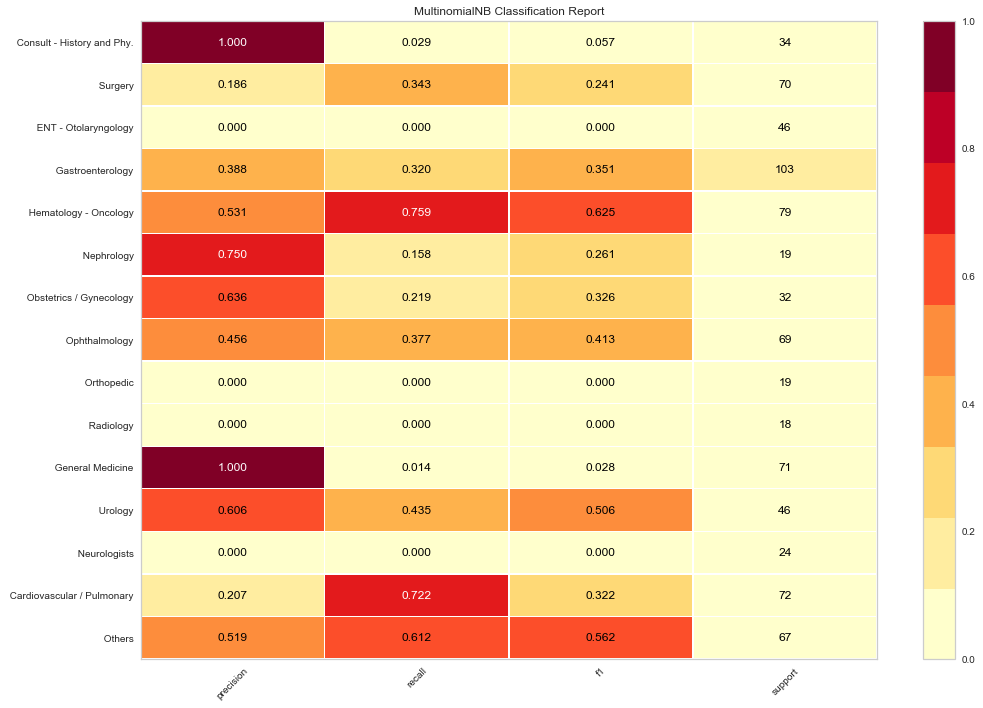

In [134]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(nb_classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_multinomial_WITHREDUCTION.png")

precision
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

recall
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 100)

rf=classifier.fit(train_tfIdf, y_train)
rf.score(test_tfIdf, y_test)

0.293888166449935

In [136]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF)
print(Conf_metrics_RF)

[' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Others' ' Orthopedic'
 ' Orthopedic' ' Cardiovascular / Pulmonary']
0.293888166449935
[[26  9  2  0  7  0  0  1  0  0  0  3 10  9  0]
 [ 2 10  0  5 27  1  1  8  1  0  3 13  0  0  1]
 [ 0  3  5  0  0  0  0  0  0  0  0  6  3  7  0]
 [ 1  7  0 14  4  0  4  0  0  0  0  4  2 10  0]
 [ 6 26  0  2 26  0  0  0  0  0  1  9  1  0  0]
 [ 1  6  1  0  5  0  0  0  1  0  0  1  1  2  0]
 [ 2  7  0  2  0  0  1  0  0  0  0  0  1  2  4]
 [ 2  8  0  0  2  1  0 25  0  0 10  3 11  7  0]
 [ 0  5  0  0  0  1  0  0 17  0  0  1  4  4  0]
 [ 0  1  0  0  0  0  0  0  0 10  1  2  0  5  0]
 [ 0  7  0  0  1  1  0 13  0  0 37  6  5  9  0]
 [ 4 21  2  1  4  0  0  3  0  1 15 41  4  7  0]
 [ 8  0  0  2  0  0  3 14  3  0  9  4  3  0  0]
 [14  0  4 12  0  1  1  1  6  5 15  2  0  4  5]
 [ 1  8  0  0  1  0  1  0  0  0  0  5  0 11  7]]


In [137]:
labels= [' Others', ' Cardiovascular / Pulmonary', ' Neurologists',
       ' Urology', ' General Medicine', ' Radiology', ' Orthopedic',
       ' Ophthalmology', ' Obstetrics / Gynecology', ' Nephrology',
       ' Hematology - Oncology', ' Gastroenterology',
       ' ENT - Otolaryngology', ' Surgery', ' Consult - History and Phy.']

In [138]:
# We can sort the features by their importance. Which feature is more importance for the prediction. 
sorted(zip(rf.feature_importances_, labels), reverse=True)

[(0.006807227198191807, ' Orthopedic'),
 (0.000275570906392034, ' Neurologists'),
 (9.240791731575851e-05, ' ENT - Otolaryngology'),
 (6.74795368634124e-05, ' Obstetrics / Gynecology'),
 (2.7584332916072858e-05, ' Urology'),
 (2.4398699398084016e-05, ' Surgery'),
 (2.4261818035737585e-05, ' Others'),
 (1.8095311526944464e-05, ' Radiology'),
 (1.2481394997740924e-05, ' General Medicine'),
 (9.607322461707069e-06, ' Ophthalmology'),
 (9.40103359693891e-06, ' Hematology - Oncology'),
 (8.095957225850952e-06, ' Consult - History and Phy.'),
 (5.5479599326867785e-06, ' Nephrology'),
 (5.307931340642047e-06, ' Cardiovascular / Pulmonary'),
 (2.9780125556410634e-06, ' Gastroenterology')]

In [139]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predRF,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.39      0.39      0.39        67
 Cardiovascular / Pulmonary       0.08      0.14      0.11        72
               Neurologists       0.36      0.21      0.26        24
                    Urology       0.37      0.30      0.33        46
           General Medicine       0.34      0.37      0.35        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.09      0.05      0.07        19
              Ophthalmology       0.38      0.36      0.37        69
    Obstetrics / Gynecology       0.61      0.53      0.57        32
                 Nephrology       0.62      0.53      0.57        19
      Hematology - Oncology       0.41      0.47      0.44        79
           Gastroenterology       0.41      0.40      0.40       103
       ENT - Otolaryngology       0.07      0.07      0.07        46
                    Surgery      

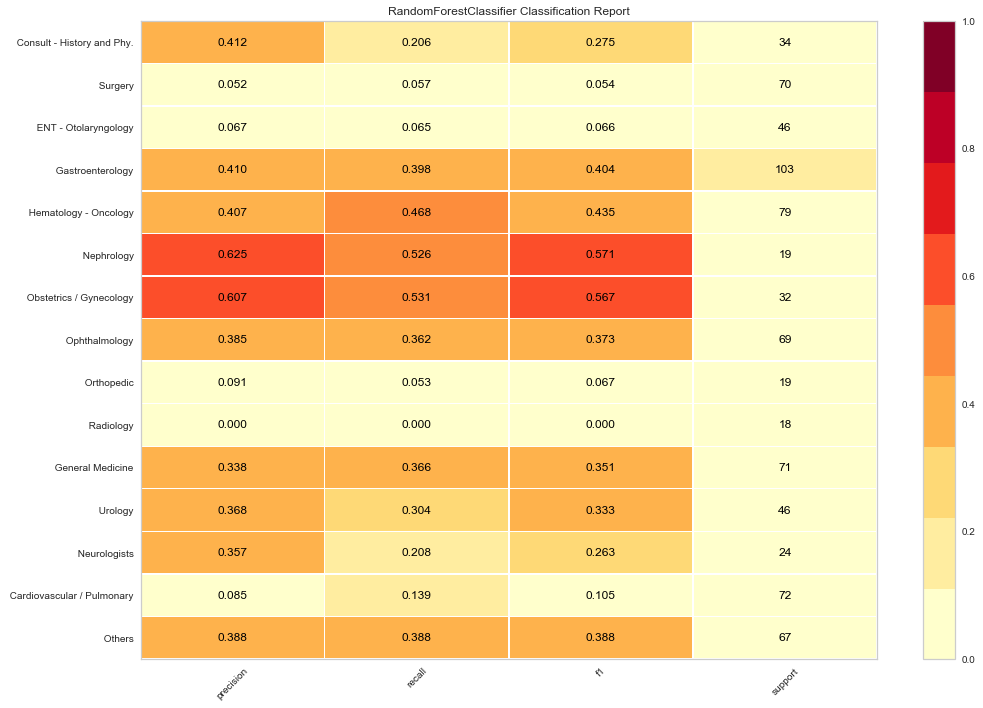

In [140]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(classifier, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_RANDOMFOREST_WITHREDUCTION.png")

In [141]:
print(f"Predicted classes: {pred2[:10]}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [' Gastroenterology' ' Consult - History and Phy.' ' Neurologists'
 ' Surgery' ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists'
 ' Orthopedic' ' Surgery' ' Cardiovascular / Pulmonary']
Actual Labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [142]:
pd.DataFrame({"Prediction": pred2[:20], "Actual": y_test[:20]}).reset_index(drop=True)

Prediction                       Actual
0              Gastroenterology                      Surgery
1    Consult - History and Phy.   Consult - History and Phy.
2                  Neurologists   Consult - History and Phy.
3                       Surgery                      Surgery
4    Cardiovascular / Pulmonary                    Radiology
5                    Orthopedic                       Others
6                  Neurologists                 Neurologists
7                    Orthopedic                      Surgery
8                       Surgery                       Others
9    Cardiovascular / Pulmonary   Cardiovascular / Pulmonary
10   Consult - History and Phy.   Cardiovascular / Pulmonary
11                   Orthopedic                   Orthopedic
12                       Others   Consult - History and Phy.
13                   Orthopedic                       Others
14                      Surgery             Gastroenterology
15                   Orthopedic                   Orthopedic
16   Consult - History and Phy.        Hematology - Oncology
17      Obstetrics / Gynecology                    Radiology
18                      Surgery                       Others
19                 Neurologists                   Orthopedic

In [143]:
# Create the GridSearchCV model
# Create first pipeline for base without reducing features.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])
# Create param grid.
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,40)),
    'classifier__max_features' : list(range(6,32,10))}
]
# Create grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# Fit on data
# Train the models with GridSearch
best_clf = clf.fit(train_tfIdf, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  7.4min finished


In [144]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'classifier': LogisticRegression(C=1.623776739188721, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__C': 1.623776739188721, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
0.4007687399822598


In [145]:
# save your model by updating "your_name" with your name
import joblib
filename = 'random_forest_grid_search.joblib'
joblib.dump(best_clf, filename)

['random_forest_grid_search.joblib']

In [146]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2,
                            target_names=labels))

                             precision    recall  f1-score   support

                     Others       0.52      0.61      0.56        67
 Cardiovascular / Pulmonary       0.21      0.72      0.32        72
               Neurologists       0.00      0.00      0.00        24
                    Urology       0.61      0.43      0.51        46
           General Medicine       1.00      0.01      0.03        71
                  Radiology       0.00      0.00      0.00        18
                 Orthopedic       0.00      0.00      0.00        19
              Ophthalmology       0.46      0.38      0.41        69
    Obstetrics / Gynecology       0.64      0.22      0.33        32
                 Nephrology       0.75      0.16      0.26        19
      Hematology - Oncology       0.53      0.76      0.63        79
           Gastroenterology       0.39      0.32      0.35       103
       ENT - Otolaryngology       0.00      0.00      0.00        46
                    Surgery      

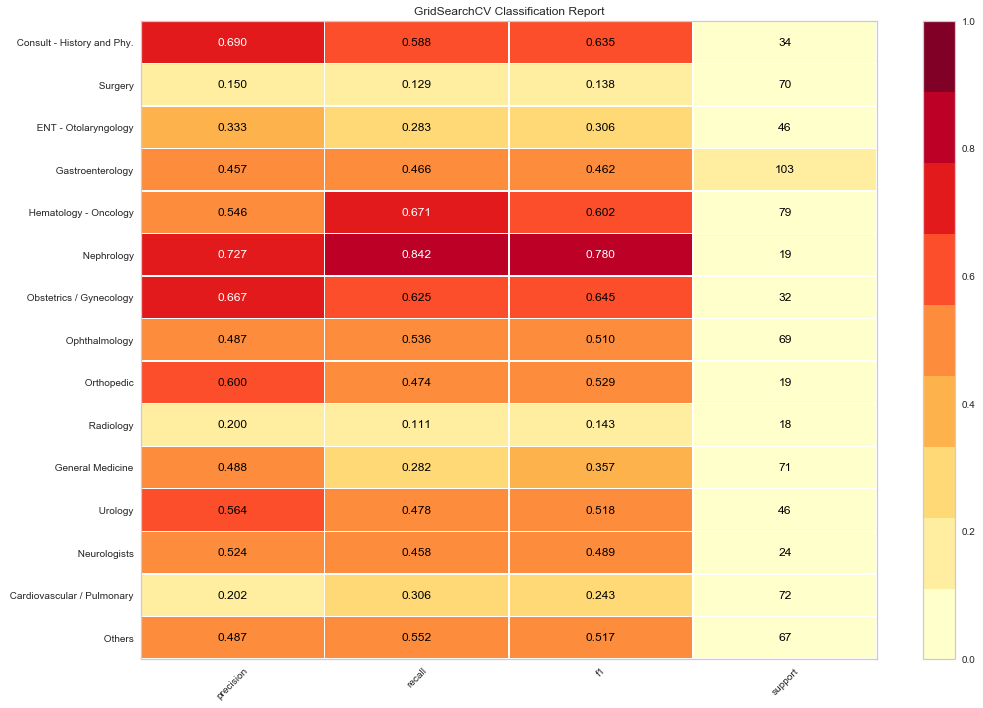

In [147]:
from yellowbrick.classifier import ClassificationReport

viz = ClassificationReport(best_clf, classes=labels, support=True,size=(1080, 720))

viz.fit(train_tfIdf, y_train)        # Fit the visualizer and the model
viz.score(test_tfIdf, y_test)        # Evaluate the model on the test data
                      # Finalize and show the figure
viz.show(outpath="plots/classification_report_GRIDSEARCH_WITHREDUCTION.png")

In [148]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
classifier.fit(train_tfIdf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
print(f"Training Data Score: {classifier.score(train_tfIdf, y_train)}")
print(f"Testing Data Score: {classifier.score(test_tfIdf, y_test)}")

Training Data Score: 0.6644370122630993
Testing Data Score: 0.34850455136540964


In [151]:
predictions = classifier.predict(test_tfIdf)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [' Gastroenterology' ' Others' ' Neurologists' ' Surgery'
 ' Cardiovascular / Pulmonary' ' Orthopedic' ' Neurologists' ' Orthopedic'
 ' Surgery' ' Cardiovascular / Pulmonary']
First 10 Actual labels: [' Surgery', ' Consult - History and Phy.', ' Consult - History and Phy.', ' Surgery', ' Radiology', ' Others', ' Neurologists', ' Surgery', ' Others', ' Cardiovascular / Pulmonary']


In [152]:
pd.DataFrame({"Prediction": predictions[:10], "Actual": y_test[:10].tolist()}).reset_index(drop=True)

Prediction                       Actual
0             Gastroenterology                      Surgery
1                       Others   Consult - History and Phy.
2                 Neurologists   Consult - History and Phy.
3                      Surgery                      Surgery
4   Cardiovascular / Pulmonary                    Radiology
5                   Orthopedic                       Others
6                 Neurologists                 Neurologists
7                   Orthopedic                      Surgery
8                      Surgery                       Others
9   Cardiovascular / Pulmonary   Cardiovascular / Pulmonary

In [153]:
import seaborn as sns
import gc
from sklearn.decomposition import PCA


In [154]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['lemmatize_to_string'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)


['abc', 'abdomen', 'abdomen bowel', 'abdomen nontender', 'abdomen pelvis', 'abnormality', 'abscess', 'abuse', 'access', 'accident', 'activity', 'acute', 'acute distress', 'addition', 'adenopathy', 'adhesion', 'admission', 'age', 'air', 'airway', 'alcohol', 'alert', 'allergy', 'allergy history', 'allergy medication', 'alternative', 'amount', 'amplitude', 'anastomosis', 'and', 'anemia', 'anesthesia', 'anesthesia patient', 'anesthetic', 'aneurysm', 'angiogram', 'angiography', 'angle', 'ankle', 'anterior', 'antibiotic', 'anxiety', 'aorta', 'ap', 'apex', 'apnea', 'appearance', 'appendix', 'appointment', 'approach', 'area', 'arm', 'artery', 'artery disease', 'arthritis', 'aspect', 'aspiration', 'assessment', 'assessment plan', 'atrium', 'atrophy', 'attachment', 'attempt', 'attention', 'auscultation', 'baby', 'back', 'bag', 'balloon', 'band', 'bandage', 'base', 'basis', 'bed', 'benefit', 'benefit alternative', 'betadine', 'biceps', 'biopsy', 'birth', 'bit', 'bladder', 'blade', 'bleeding', 'bl

In [155]:
gc.collect()
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['medical_specialty'].tolist()
category_list = data.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   


In [156]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

labels = category_list
cm = confusion_matrix(y_test, y_test_pred, labels)



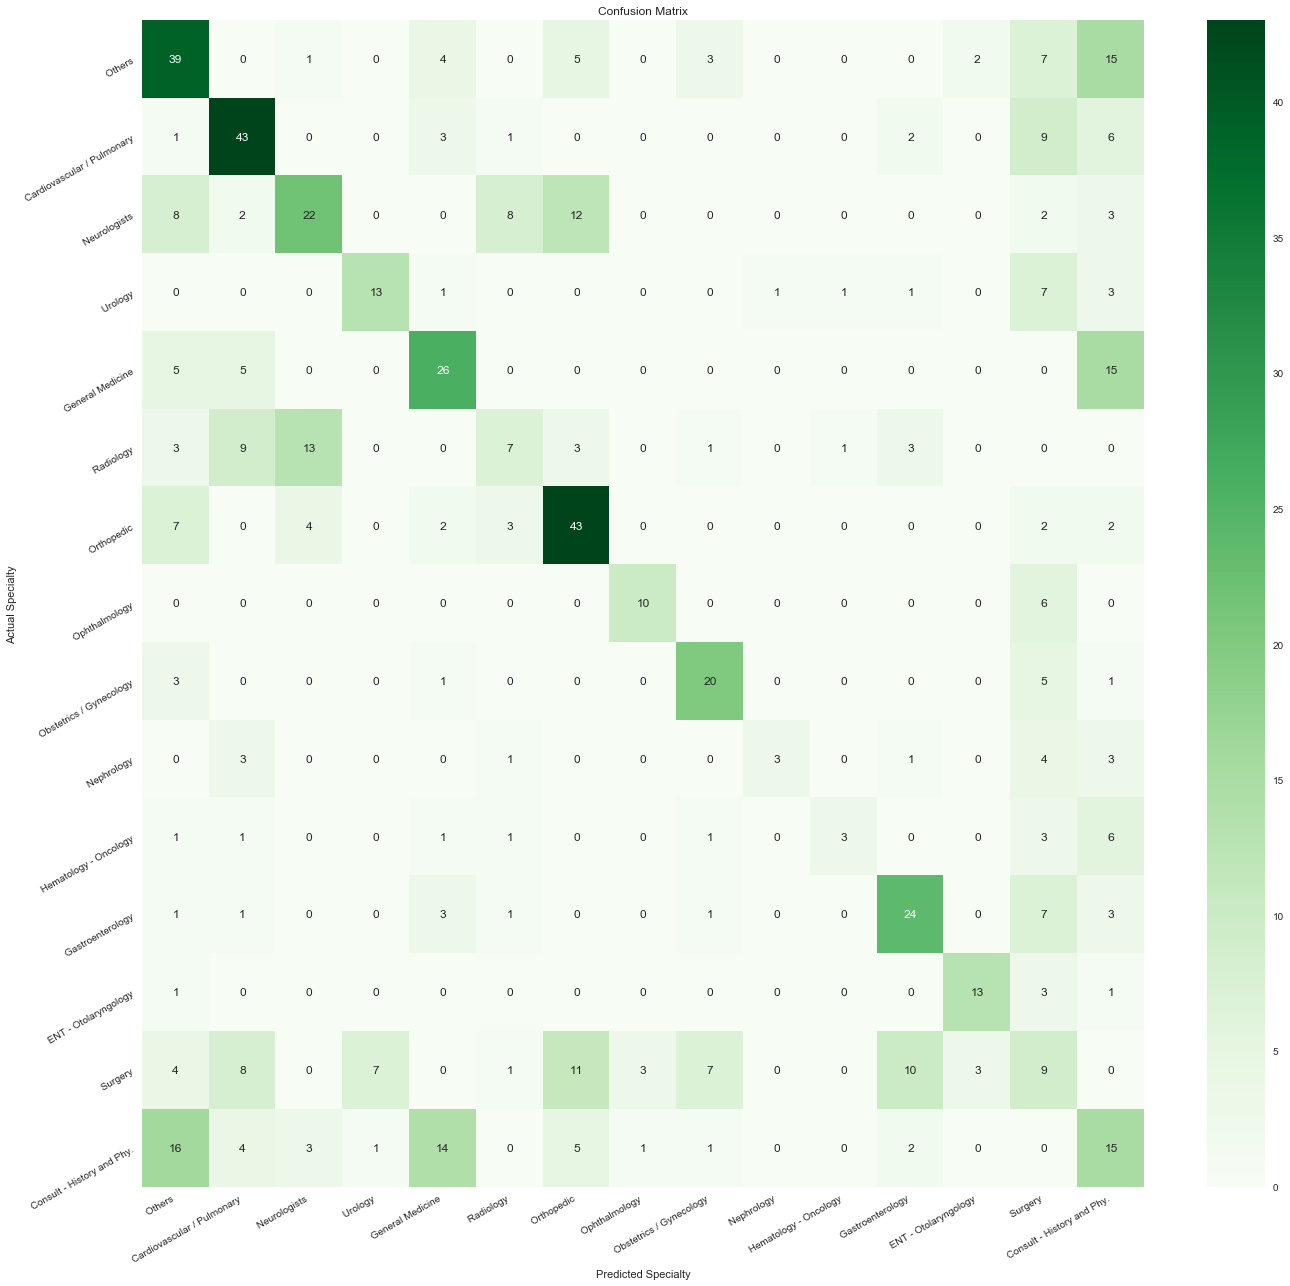

In [157]:
fig = plt.figure(figsize=(20,20))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g');

ax.set_xlabel('Predicted Specialty');ax.set_ylabel('Actual Specialty'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')    
plt.savefig("plots/confusion_matrix_with_reduction")
plt.show()